# **Customer Lifetime Value Prediction**
**Created by Grasiela Novesda**

### **Content**

1. Business Problem & Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation
<br><br>
---

In [2]:
from IPython.display import Image, display

image_url = "https://gorilladesk.com/wp-content/uploads/2020/02/customer-lifetime-value.png"

# Display the image
display(Image(url=image_url))


### **1. Business Problem Understanding**

**Domain Knowledge**

CLV bukan hanya tentang menghitung berapa nilai satu pelanggan bagi perusahaan, atau, dengan kata lain, berapa banyak keuntungan yang dapat diharapkan perusahaan asuransi dari setiap pihak yang diasuransikan selama hubungan bisnis. CLV jauh lebih dari itu. Ini adalah pengubah permainan. Dengan memanfaatkan perhitungan CLV, perusahaan asuransi dapat memperoleh pengetahuan luar biasa, yang, jika digunakan dengan benar, dapat merevolusi bisnis mereka.

Prime Insurance Company merupakan perusahaan asuransi mobil yang baru mulai mmenerapkan strategi Customer Lifetime Value (CLV) untuk meningkatkan profitabilitas dan hubungan jangka panjang dengan pelanggan. Dalam upayanya untuk memahami pola pelanggan, Prime Insurance Company ingin memanfaatkan data cLV mereka untuk melakukan analisis yang mendalam. Langkah ini diambil karena persaingan di industri asuransi semakin ketat, dan perusahaan menyadari pentingnya startegi berbasis data dalam mengoptimalkan nilai pelanggan sepanjang siklus hidup mereka.

**Problem Statement**

Saat ini Prime Insurance Company  menghadapi kesulitan dalam mengidentifikasi pelanggan yang memilii potensi nilai tinggi di masa depan. Strategi pemasaran dan retensi yang digunakan belum tersegmentasi dengan optimal berdasarkan CLV pelanggan. Selain itu, perusahaan mengalami tantangan dalam memprediksi potensi CLV dari pelanggan baru, yang menghambat efisiensi alokasi sumber daya dan pengambilan keputusan berbasis data. Akibatnya, perusahaan kehilangan peluang untuk memaksimalkan profitabilitas dari pelanggan-pelanggan tertentu.


**Goals**

1. Membangun model prediksi CLV berbasis machine learning yang dapat membantu PT Prime Protection mengidentifikasi pelanggan dengan nilai tinggi di masa depan.
2. Memberikan rekomendasi kepada tim manajemen tentang strategi pemasaran berbasis segmentasi pelanggan berdasarkan prediksi CLV.
3. Mengoptimalkan alokasi sumber daya perusahaan dengan memfokuskan strategi pada pelanggan dengan potensi profitabilitas tertinggi.


**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE. Metric RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi CLV sesuai dengan limitasi feature yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah kita akan menganalisis data yang dapat menemukan pola dari feature-feature yang ada, untuk membedakan CLV masing-masing customer. Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tools' prediksi CLV.

## **2. Data Understanding**

- Dataset merupakan data pada **tahun 2022** dari perusahaan bidang asuransi kendaraan **dari Amerika Serikat bernama Prime Insurance Company**.
- Link dataset: data_customer_lifetime_value.csv
- Setiap baris data merepresentasikan informasi terkait properti dan pemiliknya.

**Attributes Information**

| **No** | **Attribute** | **Data Type** | **Description** |
| --- | --- | --- | --- |
| 1 |  Vehicle Class | object | Jenis/tipe kendaraan pelanggan |
| 2 | Coverage | object | Jenis polis /manfaat asuransi yang pilih |
| 3 | Renew Offer Type | object | Jenis perpanjangan penawaran |
| 4 |  EmploymentStatus | object | Status pekerjaan |
| 5 |  Marital Status | object | Status pernikahan |
| 6 |  Education | object | Tingkat pendidikan |
| 7 |  Number of Policies | float64 | Jumlah polis dimiliki nasabah saat ini |
| 8 |  Monthly Premium Auto | float64 | Jumlah pembayaran asuransi bulanan nasabah (USD) |
| 9 |  Total Claim Amount |  float64 | Jumlah kumulatif klaim sejak awal polis (USD) |
| 10 |  Income | float64 | Pendapatan tahunan nasabah (USD) |
| 11 | Customer Lifetime Value  | float64 | Nilai CLV yang dimiliki pelanggan |

**Import Libraries**

In [3]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing process
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

# Machine Learning Algorithm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_score

**Load Dataset**

In [4]:
# Read dataset of Customer Lifetime Value
df = pd.read_csv('data_customer_lifetime_value.csv')
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0  Four-Door Car  Extended           Offer1          Retired       Divorced   
1  Four-Door Car     Basic           Offer1         Employed        Married   
2   Two-Door Car     Basic           Offer1          Retired        Married   
3  Four-Door Car   Premium           Offer3         Disabled        Married   
4   Two-Door Car     Basic           Offer3    Medical Leave        Married   

              Education  Number of Policies  Monthly Premium Auto  \
0  High School or Below                 2.0                  90.0   
1               College                 6.0                  62.0   
2                Master                 2.0                  62.0   
3  High School or Below                 1.0                 116.0   
4  High School or Below                 1.0                  62.0   

   Total Claim Amount   Income  Customer Lifetime Value  
0          571.479602  11828.0             10083.486880  
1          114.514440  44762.0              4943.386117  
2          257.248789  21514.0             11981.984810  
3          556.800000  17913.0              4550.856045  
4          355.820799  19030.0              2372.155492

None

In [5]:
# Cek info lebih detail untuk setiap fitur

listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

dataFeatures dataType  null  nullPct  unique  \
0             Vehicle Class   object     0      0.0       6   
1                  Coverage   object     0      0.0       3   
2          Renew Offer Type   object     0      0.0       4   
3          EmploymentStatus   object     0      0.0       5   
4            Marital Status   object     0      0.0       3   
5                 Education   object     0      0.0       5   
6        Number of Policies  float64     0      0.0       9   
7      Monthly Premium Auto  float64     0      0.0     191   
8        Total Claim Amount  float64     0      0.0    3274   
9                    Income  float64     0      0.0    3625   
10  Customer Lifetime Value  float64     0      0.0    5049   

                                         uniqueSample  
0   [Four-Door Car, Two-Door Car, SUV, Sports Car,...  
1                          [Extended, Basic, Premium]  
2                    [Offer1, Offer3, Offer2, Offer4]  
3   [Retired, Employed, Disabled, Medical Leave, U...  
4                         [Divorced, Married, Single]  
5   [High School or Below, College, Master, Bachel...  
6       [2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]  
7   [90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ...  
8   [571.479602, 114.51444, 257.248789, 556.8, 355...  
9   [11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ...  
10  [10083.48688, 4943.386117, 11981.98481, 4550.8...

In [6]:
# Show descriptive statistics from both numerical and categorical
display(df.describe(), df.describe(include='object'))

Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count         5669.000000           5669.000000         5669.000000   
mean             2.979361             93.026989          431.407103   
std              2.393187             34.551795          287.558038   
min              1.000000             61.000000            0.423310   
25%              1.000000             68.000000          266.932542   
50%              2.000000             82.000000          379.200000   
75%              4.000000            109.000000          549.986128   
max              9.000000            297.000000         2759.794354   

             Income  Customer Lifetime Value  
count   5669.000000              5669.000000  
mean   37868.188569              8029.874592  
std    30490.490723              6916.708246  
min        0.000000              1898.007675  
25%        0.000000              3954.344534  
50%    34322.000000              5800.188903  
75%    62464.000000              9031.214859  
max    99934.000000             83325.381190

Vehicle Class Coverage Renew Offer Type EmploymentStatus  \
count            5669     5669             5669             5669   
unique              6        3                4                5   
top     Four-Door Car    Basic           Offer1         Employed   
freq             2858     3477             2292             3541   

       Marital Status Education  
count            5669      5669  
unique              3         5  
top           Married  Bachelor  
freq             3305      1703

**Exploratory Data Analysis (Auto EDA)**

Sebelum menerapkan model dan melakukan analisis lebih lanjut, maka akan diterapkan Auto EDA untuk memahami karakteristik dasar dari dataset yang akan dianalisa.

In [7]:
from ydata_profiling import ProfileReport

# Buat laporan profil
profile = ProfileReport(df, title="Profil Dataset CLV", explorative=True)

# Tampilkan laporan di notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

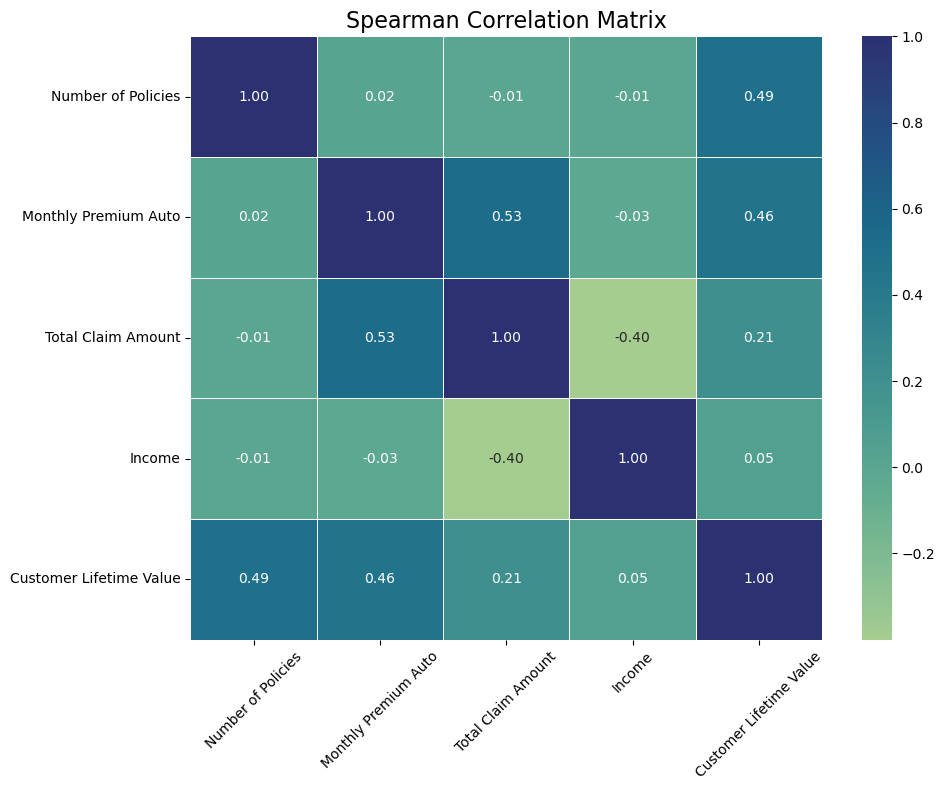

In [8]:
df_num = df.select_dtypes(include=['number'])

# Menghitung matriks korelasi Spearman
corr_matrix_spearman = df_num.corr(method='spearman')

# Visualisasi heatmap dengan Spearman correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_spearman, annot=True, cmap="crest", linewidths=0.5, fmt=".2f")
plt.title("Spearman Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Heatmap diatas menunjukkan bahwa:
1. **Customer Lifetime Value** memiliki korelasi positif terkuat dengan feature  **Number of Policies (0.49)** dan **Monthly Premium Auto (0.46)**. 
2. Feature **Income** menjadi feature yang berkorelasi terlemah dengan **Customer Lifetime Value (0.053).**
3. Ditemukan adanya korelasi sesama feature yang berkorelasi kuat yaitu antara **Monthly Premium Auto** dan **Total Claim Amount (0.53)**.

**Distribution of Numerical Feature**

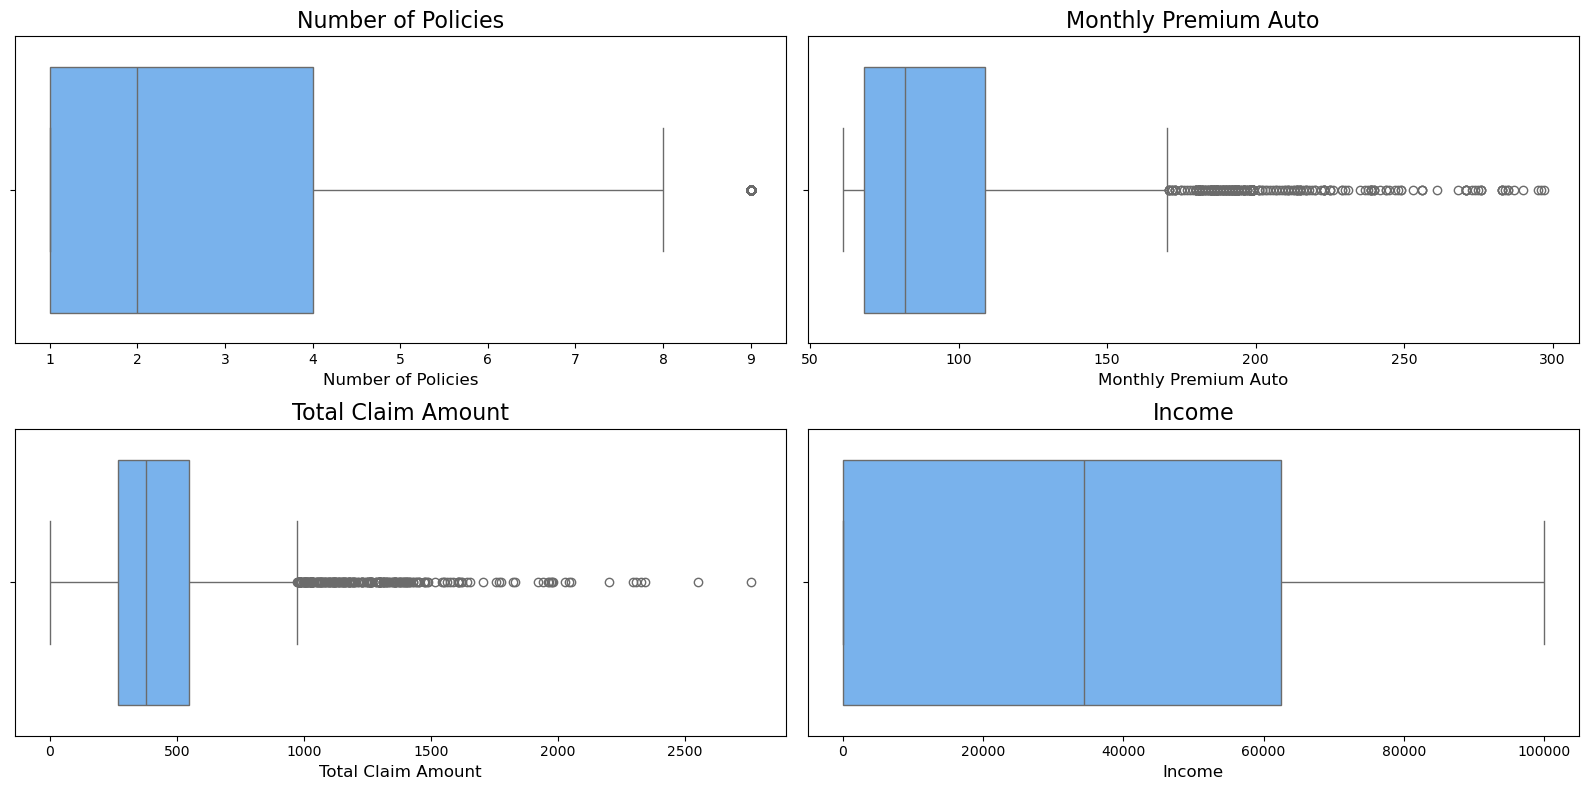

In [9]:

# Membuat variable khusus untuk feature numerical
df_num = list(df.describe().columns[:-1])  

# Menentukan ukuran figure
plt.figure(figsize=(16, 8))

# Menentukan jumlah baris dan kolom
n_cols = 2  # 2 plot per baris
n_rows = (len(df_num) + 1) // n_cols 

# Membuat box plot untuk setiap kolom numerik
num_subplot = 1
for i in df_num:
    plt.subplot(n_rows, n_cols, num_subplot)  
    sns.boxplot(data=df, x=i, color='#66B2FF') 
    plt.title(i, size=16)  
    plt.xlabel(i, fontsize=12)
    num_subplot += 1

plt.tight_layout()
plt.show()


Melihat distribusi fitur numerikal, diketahui bahwa fitur-fitur ini tidak berdistribusi normal (skewed), dan terdapat outlier pada fitur **Number of Policies, Monthly Premium Auto,** dan **Total Claim Amount**, yang akan ditangani pada bagian **Data Preprocessing**. <br> 

Untuk itu akan dilakukan pengecekan pada fitur-fitur dengan outliers ini.

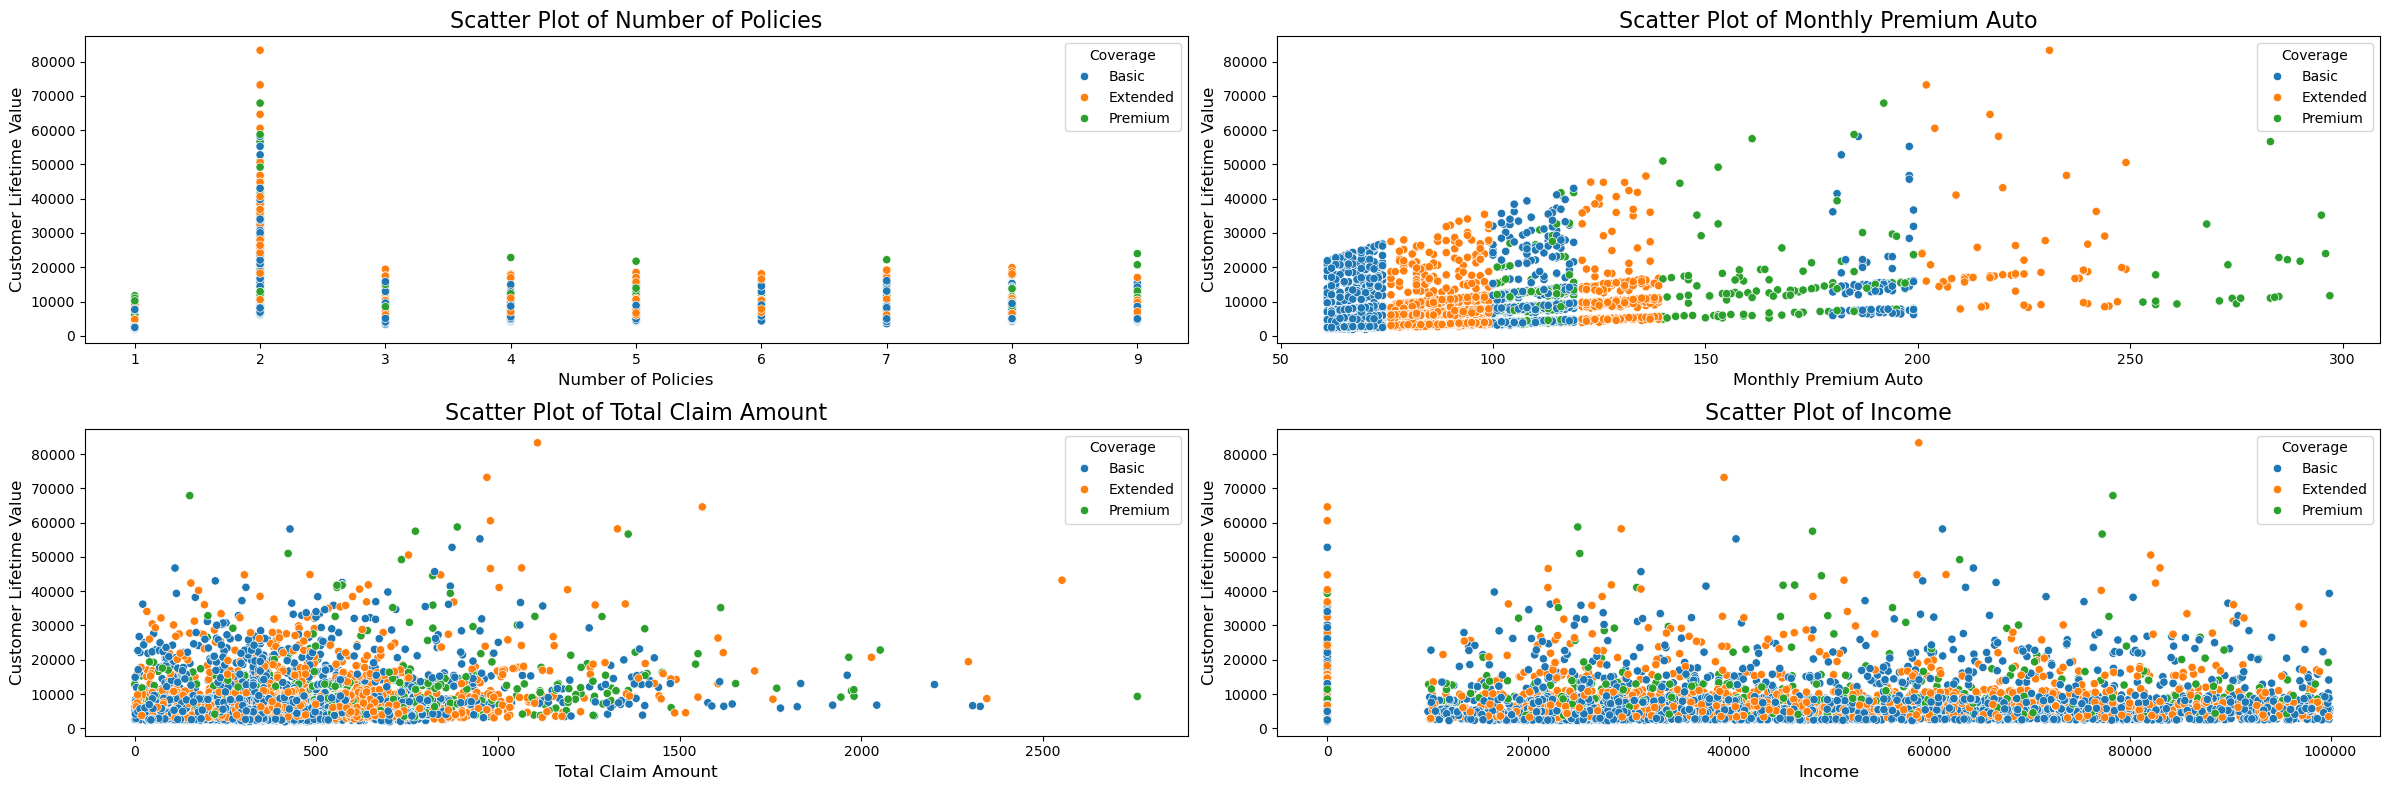

In [10]:
# Membuat variable khusus untuk feature numerical
numerical_cols = list(df.describe().columns[:-1]) 

# Menentukan ukuran figure
plt.figure(figsize=(24, 8))  # Menyesuaikan ukuran agar cukup besar untuk semua plot

# Membuat scatter plot untuk setiap kolom numerik terhadap 'Customer Lifetime Value'
num_subplot = 1
for i in numerical_cols:
    plt.subplot(2, len(numerical_cols) // 2, num_subplot)  # Membuat subplot dalam grid 2 baris
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value',hue='Coverage', hue_order=['Basic', 'Extended', 'Premium'])  # Membuat scatter plot
    plt.title(f'Scatter Plot of {i}', size=16)  # Menambahkan judul
    plt.xlabel(i, fontsize=12)  # Label untuk x-axis
    plt.ylabel('Customer Lifetime Value', fontsize=12)  # Label untuk y-axis
    plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
    num_subplot += 1

plt.show()


Setelah ditampilkan melalui scatterplot, didapatkan insight berupa:
1. Terlihat adanya sedikit peningkatan nilai CLV pada nasabah yang memiliki **Number of Policies** lebih banyak.
2. Korelasi yang dimiliki CLV cenderung meningkat secara linear dengan nilai **Monthly Premium Auto**. Dimana pelanggan dengan premi bulanan yang lebih tinggi cenderung memiliki CLV lebih tinggi.
3. Pada kolom **Total Claim Amount** tidak terlihat adanya korelasi yang jelas dengan CLV. Jumlah klaim total tidak secara langsung menentukan CLV, kemunginan hal ini terjadi karena pelanggan dengan CLV tinggi mungkin memiliki klaim rendah atau sebaliknya.
4. Tidak ditemukan adanya pengarung langsung antara kolom **Income** dan CLV. Terlihat bahwa nilai CLV tetap tersebar di berbagai tingkatan pendapatan yang dimiliki nasabah.

**Distribution of Categorical Feature vs Target**

C:\Users\User\AppData\Local\Temp\ipykernel_6980\2856045017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=i, x='Customer Lifetime Value', order=df[i].value_counts().index, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_6980\2856045017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=i, x='Customer Lifetime Value', order=df[i].value_counts().index, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_6980\2856045017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=i, x='Customer Li

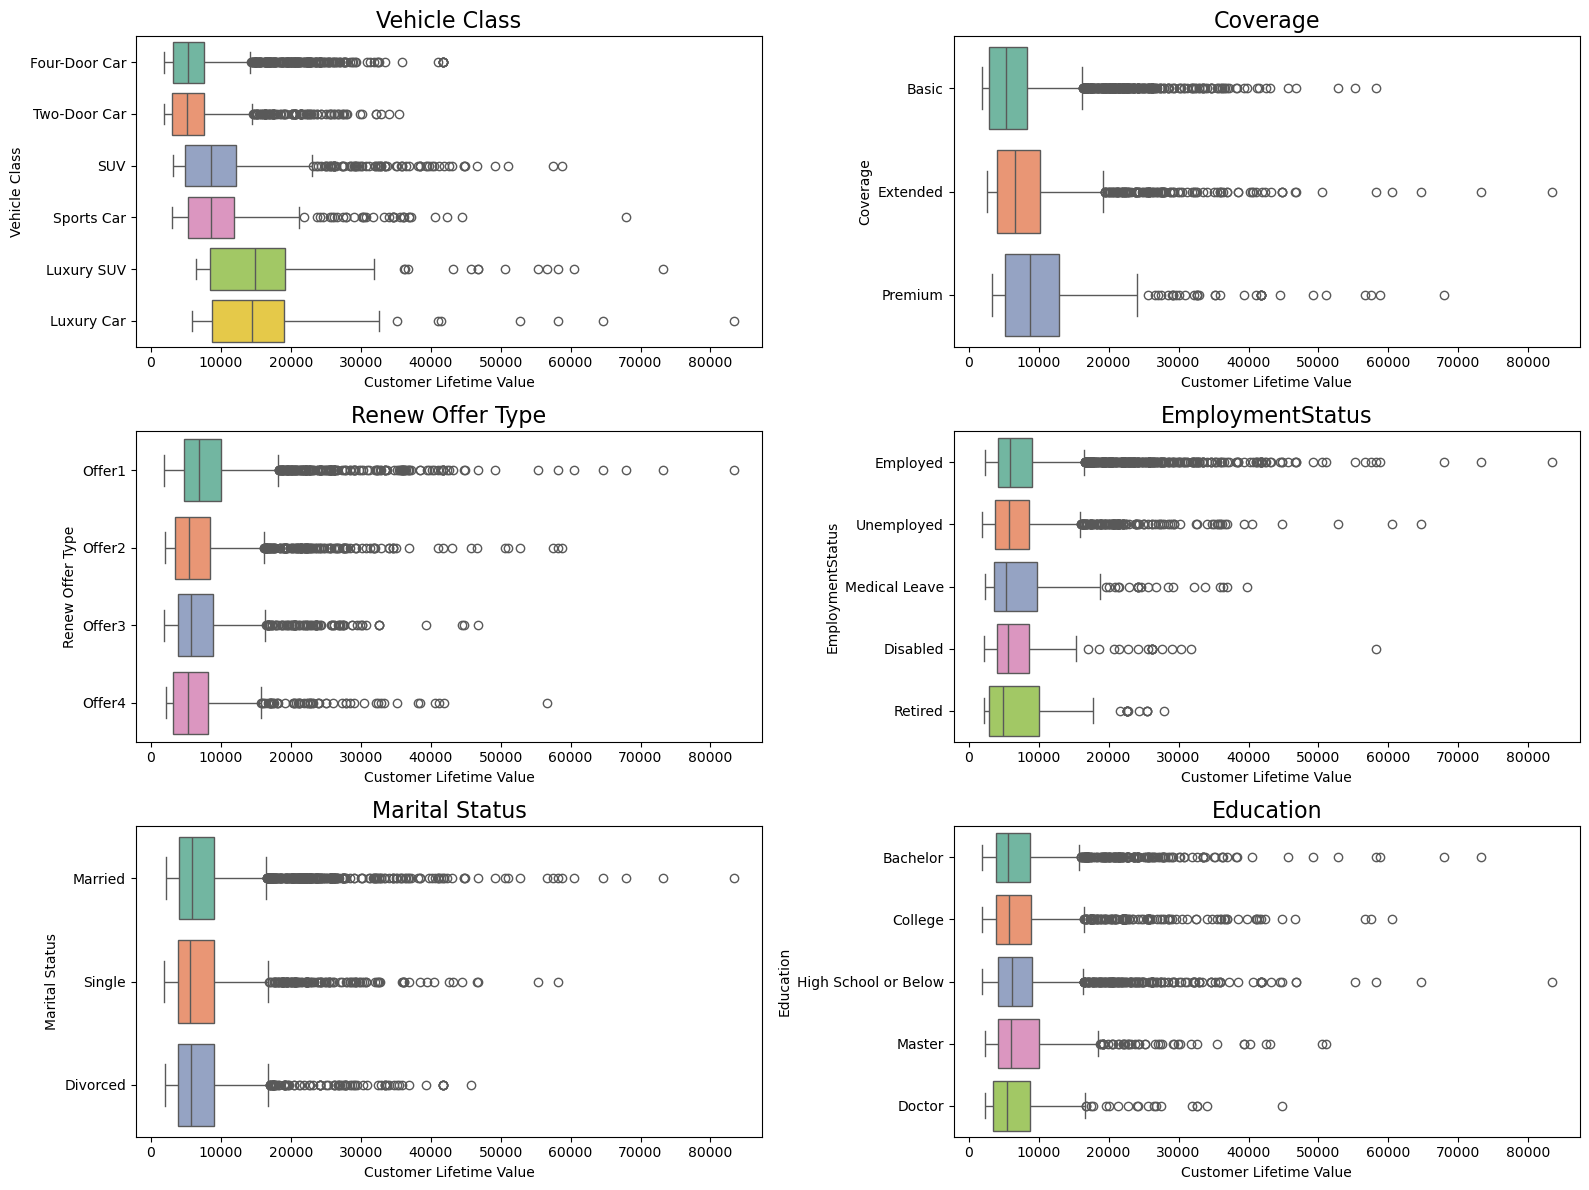

In [11]:
# Membuat variable khusus untuk feature numerical
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(16,12))
num_subplot = 1

for i in categorical_cols:
    plt.subplot(3,2,num_subplot)
    sns.boxplot(data=df, y=i, x='Customer Lifetime Value', order=df[i].value_counts().index, palette='Set2')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Interpretasi:

**1. Vehicle Class vs Customer Lifetime Value**
Interpretasi:
- Terlihat bahwa pelanggan dengan kelas kendaraan "Luxury Car" dan "Sports Car" memiliki nilai Customer Lifetime Value yang lebih tinggi dibandingkan dengan kelas kendaraan lainnya.
- Sebagian besar kendaraan seperti "Four-Door Car" dan "Two-Door Car" memiliki nilai yang tersebar lebih rendah dan konsisten, dengan beberapa outlier.

**2. Coverage vs Customer Lifetime Value**
- Jenis cakupan (coverage) "Premium" cenderung memiliki Customer Lifetime Value yang jauh lebih tinggi dibandingkan dengan "Basic" dan "Extended."
- Pelanggan dengan cakupan "Basic" memiliki nilai yang lebih rendah dan lebih tersebar.

**3. Renew Offer Type vs Customer Lifetime Value**
- Tipe penawaran "Offer 4" memiliki nilai Customer Lifetime Value yang lebih tinggi secara umum dibandingkan dengan tipe-tipe lainnya.
- "Offer 1," "Offer 2," dan "Offer 3" memiliki distribusi nilai yang lebih rendah dan kurang tersebar.

**4. Employment Status vs Customer Lifetime Value**
- Pelanggan yang "Employed" dan "Doctor" memiliki nilai Customer Lifetime Value yang relatif lebih tinggi.
- Sebaliknya, pelanggan dengan status "Unemployed" memiliki nilai yang lebih rendah.

**5. Marital Status vs Customer Lifetime Value**
- Pelanggan yang "Married" memiliki nilai Customer Lifetime Value yang cenderung lebih tinggi dibandingkan pelanggan yang "Single" atau "Divorced."
- Distribusi pada kategori "Single" dan "Divorced" lebih sempit dengan beberapa outlier.

**6. Education vs Customer Lifetime Value**
- Pelanggan dengan pendidikan "Doctor" memiliki Customer Lifetime Value yang paling tinggi, diikuti oleh "Master."
- Pelanggan dengan pendidikan "High School" dan "College" memiliki nilai yang lebih rendah secara keseluruhan.
<br><br>
---

Kesimpulan sementara:

- Pelanggan dengan atribut premium seperti kendaraan mewah, cakupan asuransi tinggi, dan pendidikan tinggi cenderung memiliki nilai Customer Lifetime Value yang lebih tinggi.
- Status pekerjaan juga memainkan peran penting; pelanggan dengan pekerjaan stabil atau bergaji tinggi memiliki nilai lebih besar.
- Terdapat pola yang jelas antara kategori pelanggan dan distribusi Customer Lifetime Value, yang dapat membantu menentukan strategi pemasaran dan segmentasi pelanggan.



## **3. Data Preprocessing**

#### **3.1 Data Cleaning**

Pada tahap ini, saya akan melakukan beberapa tahap feature engineering pada dataset agar data yang dapat digunakan dengan baik untuk modeling selanjutnya. Feature engineering ini sangat penting karena sesuai dengan konsep Machine Learning 'Garbage in Garbage Out' bahwa sebagus apapun prosesnya atau secanggih apapun metode/modeling yang digunakan, ketika yang kita input 'sampah' hasilnya pun akan menjadi 'sampah' (input data yang tidak bagus menghasilkan modeling yang tidak bagus pula).

Untuk feature engineering ini, yang akan saya lakukan adalah:
- Missing Values
- Duplicated Data
- Outlier
- Scaling Encoding

Sebelum memulai, saya akan menduplikat dataset awal menjadi dataset baru khusus untuk preprocessing dan modeling agar tidak mengubah nilai/bentuk dari dataset awal.

In [12]:
# Membuat duplikasi dataframe
df_model = df.copy()

**Check Missing Value**

In [13]:
# Print missing values by column
print(df_model.isnull().sum())

# Print specific missing values
missing_values = df_model.isna().all(axis=1)
print("Rows with all missing values:", df_model[missing_values])

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64
Rows with all missing values: Empty DataFrame
Columns: [Vehicle Class, Coverage, Renew Offer Type, EmploymentStatus, Marital Status, Education, Number of Policies, Monthly Premium Auto, Total Claim Amount, Income, Customer Lifetime Value]
Index: []


In [14]:
# Deteksi nilai '?' atau 'Unknown'
invalid_values = ['?', 'Unknown', -1, 9999]
for value in invalid_values:
    print(f"Jumlah {value}:")
    print((df_model == value).sum())

Jumlah ?:
Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64
Jumlah Unknown:
Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64
Jumlah -1:
Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer 

Dari pengecekan Missing Value diatas tidak ditemukan adanya data kosong, maupun adanya ketidaksesuain input data.

**Check Duplicated Data**

In [15]:
# check data duplicate
print(f"Jumlah data duplikat: {df_model.duplicated().sum()}")

# print all the data duplicated
df_model[df_model.duplicated()]

Jumlah data duplikat: 618


Vehicle Class  Coverage Renew Offer Type EmploymentStatus  \
188      Sports Car     Basic           Offer2       Unemployed   
256   Four-Door Car     Basic           Offer1          Retired   
331             SUV     Basic           Offer2         Employed   
362             SUV     Basic           Offer2       Unemployed   
366             SUV  Extended           Offer1       Unemployed   
...             ...       ...              ...              ...   
5624     Luxury SUV   Premium           Offer1          Retired   
5640            SUV  Extended           Offer2       Unemployed   
5642  Four-Door Car  Extended           Offer2         Employed   
5654  Four-Door Car  Extended           Offer2         Employed   
5667     Luxury SUV  Extended           Offer2         Employed   

     Marital Status             Education  Number of Policies  \
188         Married  High School or Below                 3.0   
256          Single              Bachelor                 1.0   
331          Single                Master                 1.0   
362         Married              Bachelor                 1.0   
366          Single               College                 2.0   
...             ...                   ...                 ...   
5624        Married              Bachelor                 1.0   
5640        Married               College                 1.0   
5642        Married               College                 1.0   
5654        Married               College                 8.0   
5667       Divorced                Master                 7.0   

      Monthly Premium Auto  Total Claim Amount   Income  \
188                  119.0          571.200000      0.0   
256                   63.0          347.857619  24910.0   
331                  107.0          513.600000  29462.0   
362                  102.0          660.430456      0.0   
366                  126.0          604.800000      0.0   
...                    ...                 ...      ...   
5624                 271.0         1300.800000  14290.0   
5640                 122.0          725.870693      0.0   
5642                  95.0          281.110788  93272.0   
5654                  82.0          393.600000  72608.0   
5667                 239.0         1294.700423  22705.0   

      Customer Lifetime Value  
188               9048.983447  
256               2248.449633  
331               4170.687348  
362               3567.503755  
366              13727.799720  
...                       ...  
5624             10179.717040  
5640              4270.034394  
5642              3861.486269  
5654              6521.368813  
5667             19160.989940  

[618 rows x 11 columns]

In [16]:
# Drop data duplicates
df_model.drop_duplicates(inplace=True)

# Menampilkan jumlah baris dan kolom setelah drop duplicates
print(f'How many Rows: {df_model.shape[0]}\nHow Many Columns: {df_model.shape[1]}')

How many Rows: 5051
How Many Columns: 11


Telah ditemukan 618 rows yang merupakan data duplicate pada dataset CLV. Hal ini mungkin terjadi saat dilakukan penginputan data nasabah. Oleh karena itu data-data duplikat ini selanjutnya akan dihapus demi mengurangi bias saat prediksi. 

Setelah dihapus data yang tersisa saat ini sebanya 5051 baris dan 11 kolom.

**Check Outlier**

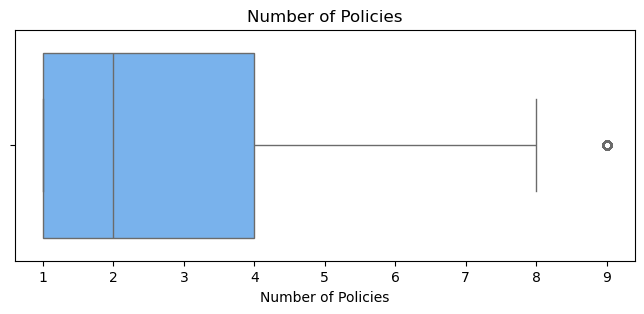

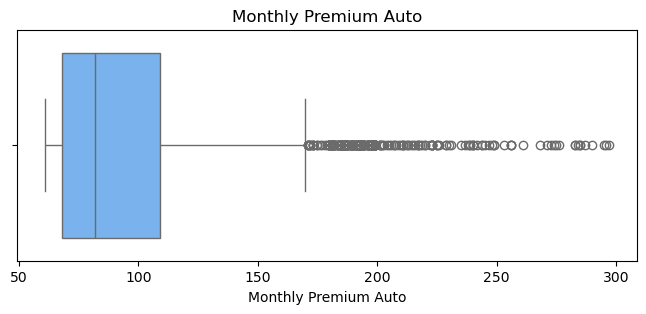

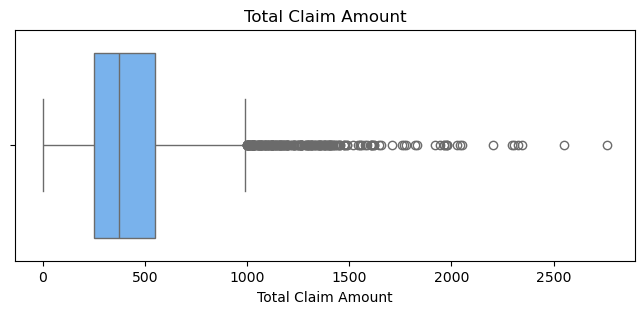

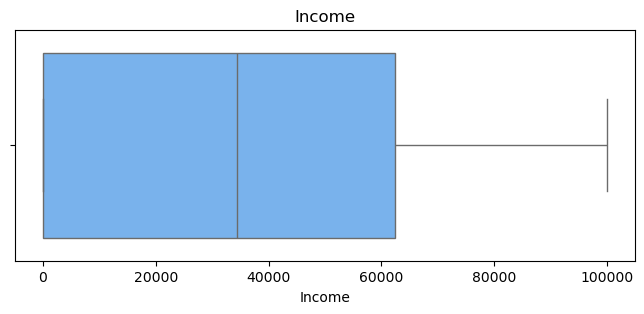

In [17]:
# Boxplot untuk fitur numerikal
for i in numerical_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=i, data=df_model, color='#66B2FF')
    plt.title(i)
    plt.show()

In [18]:
df_model.describe()

Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count         5051.000000           5051.000000         5051.000000   
mean             2.992081             92.911107          429.798954   
std              2.386500             34.335010          293.129102   
min              1.000000             61.000000            0.423310   
25%              1.000000             68.000000          251.776304   
50%              2.000000             82.000000          374.400000   
75%              4.000000            109.000000          548.123122   
max              9.000000            297.000000         2759.794354   

             Income  Customer Lifetime Value  
count   5051.000000              5051.000000  
mean   37739.838448              8059.483178  
std    30691.452111              6989.189674  
min        0.000000              1898.007675  
25%        0.000000              3964.441004  
50%    34322.000000              5837.528088  
75%    62471.500000              9028.564632  
max    99934.000000             83325.381190

In [19]:
# Calculate the CLV that above 9028
df_model[df_model['Customer Lifetime Value'] > 9028]

Vehicle Class  Coverage Renew Offer Type EmploymentStatus  \
0     Four-Door Car  Extended           Offer1          Retired   
2      Two-Door Car     Basic           Offer1          Retired   
6     Four-Door Car   Premium           Offer2         Employed   
9     Four-Door Car   Premium           Offer3         Employed   
11    Four-Door Car     Basic           Offer1         Employed   
...             ...       ...              ...              ...   
5635  Four-Door Car  Extended           Offer4         Employed   
5643            SUV  Extended           Offer1       Unemployed   
5649            SUV     Basic           Offer3         Employed   
5662     Luxury Car   Premium           Offer2         Employed   
5665  Four-Door Car   Premium           Offer1         Employed   

     Marital Status             Education  Number of Policies  \
0          Divorced  High School or Below                 2.0   
2           Married                Master                 2.0   
6           Married  High School or Below                 2.0   
9          Divorced               College                 3.0   
11           Single              Bachelor                 2.0   
...             ...                   ...                 ...   
5635        Married  High School or Below                 2.0   
5643         Single              Bachelor                 2.0   
5649        Married  High School or Below                 8.0   
5662        Married                Doctor                 9.0   
5665       Divorced              Bachelor                 2.0   

      Monthly Premium Auto  Total Claim Amount   Income  \
0                     90.0          571.479602  11828.0   
2                     62.0          257.248789  21514.0   
6                    101.0          584.567645  25419.0   
9                    117.0          582.781896  59624.0   
11                    66.0          227.446260  35624.0   
...                    ...                 ...      ...   
5635                  88.0          422.400000  28505.0   
5643                 127.0          609.600000      0.0   
5649                 118.0          566.400000  27824.0   
5662                 296.0          498.159874  79655.0   
5665                 109.0          523.200000  27778.0   

      Customer Lifetime Value  
0                10083.486880  
2                11981.984810  
6                12052.984090  
9                 9156.322563  
11               19237.770890  
...                       ...  
5635             10552.427280  
5643             18269.536920  
5649              9427.684903  
5662             23984.621440  
5665             12904.943360  

[1264 rows x 11 columns]

Dari tabel df.describe(), ditemukan bahwa:

1. Median dari kolom `Number of Polices` adalah 2
2. Median dari kolom `Monthly Premium Auto` adalah $82
3. Median dari kolom `Total Claim Amount` adlah $374
4. Pada kolom `Income` ditemukkan adanya value 0 yang akan diinvestigasi lebih lanjut.
5. Ditemukan adanya 1264 dari 5051 nasabah yang memiliki nilai `Customer Lifetime Values` diatas batas atas nilai rata-rata CLV yang ada.

In [20]:
# Check for df['Income'] == 0
df_model[df_model['Income']==0]

Vehicle Class  Coverage Renew Offer Type EmploymentStatus  \
16    Four-Door Car     Basic           Offer2       Unemployed   
17              SUV  Extended           Offer1       Unemployed   
21              SUV  Extended           Offer4       Unemployed   
24     Two-Door Car  Extended           Offer1       Unemployed   
26    Four-Door Car     Basic           Offer4       Unemployed   
...             ...       ...              ...              ...   
5651            SUV  Extended           Offer1       Unemployed   
5652  Four-Door Car  Extended           Offer4       Unemployed   
5655   Two-Door Car     Basic           Offer1       Unemployed   
5660   Two-Door Car     Basic           Offer2       Unemployed   
5664  Four-Door Car     Basic           Offer4       Unemployed   

     Marital Status             Education  Number of Policies  \
16          Married              Bachelor                 7.0   
17           Single               College                 1.0   
21           Single              Bachelor                 1.0   
24         Divorced              Bachelor                 5.0   
26           Single              Bachelor                 1.0   
...             ...                   ...                 ...   
5651         Single  High School or Below                 1.0   
5652        Married              Bachelor                 5.0   
5655        Married              Bachelor                 9.0   
5660         Single               College                 7.0   
5664         Single  High School or Below                 1.0   

      Monthly Premium Auto  Total Claim Amount  Income  \
16                    64.0          307.200000     0.0   
17                   129.0         1178.950186     0.0   
21                   126.0          907.200000     0.0   
24                    95.0          456.000000     0.0   
26                    66.0          475.200000     0.0   
...                    ...                 ...     ...   
5651                 129.0         1486.410662     0.0   
5652                  95.0          456.000000     0.0   
5655                  67.0          132.443705     0.0   
5660                  72.0          391.636628     0.0   
5664                  74.0          532.800000     0.0   

      Customer Lifetime Value  
16                4774.751709  
17                4711.845199  
21                4531.675269  
24                6846.150323  
26                2239.647297  
...                       ...  
5651              4502.867562  
5652              6661.744145  
5655              4927.707574  
5660              4936.888359  
5664              2442.216651  

[1332 rows x 11 columns]

In [21]:
# Calculating proportion of customer that has zero income
len(df_model[df_model['Income']==0]) / len(df) * 100

23.49620744399365

In [22]:
df_model[df_model['Income'] == 0]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

In [23]:
# Get to know their marital status
df_model[df_model['Income']==0]['Marital Status'].value_counts()

Marital Status
Single      786
Married     440
Divorced    106
Name: count, dtype: int64

In [24]:
# Create pivot table for Marital Status and Education
pd.pivot_table(data = df_model[df_model['Income']==0], columns='Marital Status', index='Education', values='EmploymentStatus',aggfunc='count')
                           

Marital Status        Divorced  Married  Single
Education                                      
Bachelor                    31      133     240
College                     31      124     230
Doctor                       6       22       1
High School or Below        27      128     306
Master                      11       33       9

**Interpretasi:**

Sebelum memutuskan apakah nilai income sebesar 0 dianggap sebagai missing values atau outliers, saya meninjau beberapa fitur pelanggan dan menemukan hal-hal berikut:

1. Pelanggan dengan pendapatan 0 umumnya tidak bekerja (unemployed).
2. Sebagian besar dari mereka yang berpendapatan 0 adalah single, dan sebagian besar memiliki tingkat pendidikan sekolah menengah atau di bawahnya.

Namun, karena tidak ada informasi mengenai usia dan jenis kelamin, sulit untuk memastikan apakah mereka adalah anak di bawah umur. Ada kemungkinan bahwa pelanggan dengan pendapatan 0 memiliki asuransi karena alasan berikut:

1. Orang tua menggunakan nama anak mereka untuk kepemilikan dan pembelian asuransi.
2. Pasangan menggunakan nama pasangan mereka untuk kepemilikan dan pembelian asuransi.

Namun, mengingat kompleksitas dataset ini, menentukan keberadaan kasus-kasus tersebut menjadi lebih sulit.

Selain itu, meskipun memiliki pendapatan 0, pelanggan tetap memiliki Customer Lifetime Value. Hal ini menunjukkan bahwa **pendapatan mungkin tidak memiliki pengaruh signifikan terhadap pembentukan Customer Lifetime Value**. Bahkan, korelasi Spearman yang menunjukkan nilai sangat kecil mengindikasikan pengaruh Income yang minimal (weak correlation).

Oleh karena itu, untuk kasus di mana fitur `Income` == 0, kita **tidak akan menganggapnya sebagai missing values atau outliers**. Selain itu, fakta bahwa nilai ini mencakup 25% dari seluruh dataset juga menjadi pertimbangan penting sebelum memutuskan untuk menghapus data tersebut.

In [25]:
# Outliers pada fitur Number of Policies
q3_number_of_policies = df_model['Number of Policies'].describe()['75%']
q1_number_of_policies = df_model['Number of Policies'].describe()['25%']
IQR_number_of_policies = q3_number_of_policies - q1_number_of_policies
print('Q3 of number of policies is', q3_number_of_policies)
print('Q1 of number of policies is', q1_number_of_policies)
print ('IQR number of policies is', IQR_number_of_policies)

upperbound_number_of_policies = q3_number_of_policies + (1.5*IQR_number_of_policies)
print(f'Upperbound of Number of Policies is {upperbound_number_of_policies}')

# Find the length of DataFrame that has Number of Policies more than upperbound
print("Total data that Number of Policies exceed it's upperbound is",len(df_model[df_model['Number of Policies'] > q3_number_of_policies]))
print('The proportion is',len(df_model[df_model['Number of Policies'] > q3_number_of_policies])/len(df_model))

Q3 of number of policies is 4.0
Q1 of number of policies is 1.0
IQR number of policies is 3.0
Upperbound of Number of Policies is 8.5
Total data that Number of Policies exceed it's upperbound is 1138
The proportion is 0.22530192041179964


In [26]:
# Check quartil information from Monthly Premium Auto
q3_monthly_premium = df_model['Monthly Premium Auto'].describe()['75%']
q1_monthly_premium = df_model['Monthly Premium Auto'].describe()['25%']
IQR_monthly_premium = q3_monthly_premium - q1_monthly_premium
print('Q3 of Monthly Premium Auto is', q3_monthly_premium)
print('Q1 of Monthly Premium Auto is', q1_monthly_premium)
print ('IQR Monthly Premium Auto is', IQR_monthly_premium)

upperbound_monthly_premium = q3_monthly_premium + (1.5*IQR_monthly_premium)
print(f'Upperbound of Monthly Premium Auto is {upperbound_monthly_premium}')

# Find the length of DataFrame that has Monthly Premium Auto more than upperbound
print("Total data that monrthly premium auto exceed it's upperbound is",len(df_model[df_model['Monthly Premium Auto'] > q3_monthly_premium]))
print('The proportion is',len(df_model[df_model['Monthly Premium Auto'] > q3_monthly_premium])/len(df_model))

Q3 of Monthly Premium Auto is 109.0
Q1 of Monthly Premium Auto is 68.0
IQR Monthly Premium Auto is 41.0
Upperbound of Monthly Premium Auto is 170.5
Total data that monrthly premium auto exceed it's upperbound is 1215
The proportion is 0.24054642645020788


In [27]:
# Check quartil information from Total Claim Amount 
q3_total_claim = df_model['Total Claim Amount'].describe()['75%']
q1_total_claim = df_model['Total Claim Amount'].describe()['25%']
IQR_total_claim = q3_total_claim - q1_total_claim
print('Q3 of Total Claim Amount is', q3_total_claim)
print('Q1 of Total Claim Amount is', q1_total_claim)
print ('IQR Total Claim Amount is', IQR_total_claim)

upperbound_total_claim = q3_total_claim + (1.5*IQR_total_claim)
print(f'Upperbound of Total Claim Amount is {upperbound_total_claim}')

# Find the length of DataFrame that has Total Claim Amount more than upperbound
print("Total data that total claim exceed it's upperbound is",len(df_model[df_model['Total Claim Amount'] > q3_total_claim]))
print('The proportion is',len(df_model[df_model['Total Claim Amount'] > q3_total_claim])/len(df_model))

Q3 of Total Claim Amount is 548.1231215
Q1 of Total Claim Amount is 251.776304
IQR Total Claim Amount is 296.34681750000004
Upperbound of Total Claim Amount is 992.6433477500001
Total data that total claim exceed it's upperbound is 1263
The proportion is 0.25004949514947533


**Interpretasi:**

1. Karakteristik Data Outliers:
- Ketiga fitur menunjukkan distribusi yang skewed, dengan proporsi outliers signifikan: 22.53% pada Number of Policies, 24.05% pada Monthly Premium Auto, dan 25.00% pada Total Claim Amount.
- Outliers ini mungkin mewakili segmen pelanggan yang unik, seperti pelanggan dengan kebutuhan cakupan yang luas, risiko tinggi, atau potensi kerugian yang besar.

2. Nilai Informasi Outliers:
- Outliers pada Number of Policies mencerminkan pelanggan yang membeli banyak polis, yang dapat menjadi target strategi upselling dan cross-selling.
- Outliers pada Monthly Premium Auto mencerminkan pelanggan dengan premi tinggi, yang penting untuk analisis profitabilitas.
- Outliers pada Total Claim Amount mencerminkan klaim besar, yang relevan untuk analisis risiko dan manajemen kerugian.

3. Keputusan untuk Mempertahankan Outliers:
- Outliers akan dipertahankan karena mereka mengandung informasi yang relevan dan signifikan untuk analisis lebih lanjut.
- Penghapusan outliers berisiko menghilangkan pola penting yang dapat memengaruhi strategi bisnis dan prediksi model.

**Check Clean Dataset**

In [28]:
display(df_model.head(), df_model.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5051 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5051 non-null   object 
 1   Coverage                 5051 non-null   object 
 2   Renew Offer Type         5051 non-null   object 
 3   EmploymentStatus         5051 non-null   object 
 4   Marital Status           5051 non-null   object 
 5   Education                5051 non-null   object 
 6   Number of Policies       5051 non-null   float64
 7   Monthly Premium Auto     5051 non-null   float64
 8   Total Claim Amount       5051 non-null   float64
 9   Income                   5051 non-null   float64
 10  Customer Lifetime Value  5051 non-null   float64
dtypes: float64(5), object(6)
memory usage: 473.5+ KB


Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0  Four-Door Car  Extended           Offer1          Retired       Divorced   
1  Four-Door Car     Basic           Offer1         Employed        Married   
2   Two-Door Car     Basic           Offer1          Retired        Married   
3  Four-Door Car   Premium           Offer3         Disabled        Married   
4   Two-Door Car     Basic           Offer3    Medical Leave        Married   

              Education  Number of Policies  Monthly Premium Auto  \
0  High School or Below                 2.0                  90.0   
1               College                 6.0                  62.0   
2                Master                 2.0                  62.0   
3  High School or Below                 1.0                 116.0   
4  High School or Below                 1.0                  62.0   

   Total Claim Amount   Income  Customer Lifetime Value  
0          571.479602  11828.0             10083.486880  
1          114.514440  44762.0              4943.386117  
2          257.248789  21514.0             11981.984810  
3          556.800000  17913.0              4550.856045  
4          355.820799  19030.0              2372.155492

None

#### **3.2 Encoding & Scalling**

Encoding adalah metode yang digunakan untuk merepresentasikan variabel kategorikal ke dalam bentuk numerik dalam pembelajaran mesin. Dalam proyek ini, saya menggunakan `One-hot encoding` dan `Ordinal encoding`.

* **One-hot encoding**  diterapkan untuk fitur kategorikal nominal karena fitur-fitur ini tidak memiliki hierarki di antara nilai-nilainya dan jumlah nilai uniknya tidak terlalu banyak.

* **Ordinal encoding** digunakan untuk fitur kategorikal ordinal, yaitu fitur yang nilai-nilainya memiliki hierarki atau urutan tertentu.

Berikut adalah pembagian encoder yang digunakan:

* `One-hot encoding: Vehicle Class, EmploymentStatus, Renew Offer Type, Marital Status.`
* `Ordinal encoding: Coverage, Education.`

Untuk menerapkan encoding ini, saya menggunakan ColumnTransformer yang akan diintegrasikan ke dalam pipeline model. Hal ini memudahkan proses preprocessing data sehingga menjadi lebih efisien dan terorganisasi.

In [29]:
categories_encoding = df_model.select_dtypes(include=['object']).columns.tolist()
print("Fitur Kategorikal:", categories_encoding)

Fitur Kategorikal: ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education']


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import OrdinalEncoder

# Mapping ordinal encoding
coverage_mapping = {None: 0, 'Basic': 1, 'Extended': 2, 'Premium': 3}
education_mapping = {None: 0, 'High School or Below': 1, 'College': 2, 'Bachelor': 3, 'Master': 4, 'Doctor': 5}

# Membuat OrdinalEncoder dengan pengaturan untuk handle_unknown
ordinal_encoder_alpha = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Menggabungkan encoder dalam column transformer
col_transform_true = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']),
    ('ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('scaler', RobustScaler(), ['Monthly Premium Auto', 'Income', 'Number of Policies', 'Total Claim Amount'])
], remainder='passthrough')

# Melihat hasil data yang sudah di-encode dan diskalakan
col_transform_true 


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Coverage', 'Education']),
                                ('scaler', RobustScaler(),
                                 ['Monthly Premium Auto', 'Income',
                                  'Number of Policies',
                                  'Total Claim Amount'])])

## **4. Modelling**

#### **4.1 Data Splitting**

In [31]:
# Split the data into features and target
X = df_model.drop(columns=['Customer Lifetime Value'], axis=1)  
y = df_model['Customer Lifetime Value']

In [32]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size = 0.3,
    random_state = 69)

#### **4.2 Brenchmarking Model**

*Membandingkan berbagai model regresi untuk memprediksi target dan memilih model terbaik berdasarkan kinerja.* <br><br>
Model yang Digunakan:
* Linear Regression
* Ridge & Lasso Regression
* K-Nearest Neighbors (KNN)
* Decision Tree Regressor
* Random Forest
* Gradient Boosting 
* XGBoost

**Pemilihan & Pelatihan Model**

In [33]:
# Define Algorithms
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso(random_state = 69)
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=69)
rf = RandomForestRegressor(random_state=69)
ada = AdaBoostRegressor(random_state=69)
xgb = XGBRegressor(random_state=69)
gbr = GradientBoostingRegressor(random_state=69)

In [34]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_gbr = TransformedTargetRegressor(gbr, func=np.log, inverse_func=np.exp)

In [35]:
# Kandidat algoritma yang digunakan
models = [log_lr, log_ridge, log_lasso, log_knn, log_dt, log_rf, log_ada, log_xgb, log_gbr]

score_rmse = []                  
nilai_mean_rmse = []    
nilai_std_rmse = []  

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

In [36]:
# Mencari algoritma terbaik berdasarkan tiap metrics

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=69)

    estimator = Pipeline([
        ("preprocessing", col_transform_true),
        ("scaler", RobustScaler()),
        ("model", i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

     # R-square
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-6918.24478498 -6133.32444827 -6687.75614971 -6382.02891766
 -6697.76400901] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-3881.65022169 -3441.24432834 -3439.88306464 -3508.05924285
 -3701.01936242] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.43811388 -0.4209045  -0.39576152 -0.41451207 -0.44083477] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.07508304 0.09920317 0.15394042 0.16309794 0.10464501] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-6918.52470485 -6133.72219548 -6689.49509034 -6383.00275031
 -6699.02693259] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge()

**Model Evaluation**

In [37]:
# Create the DataFrame with cross-validation results
model_summary = pd.DataFrame({
    'Model': ["Linear Regression", "Ridge Regression", 
              "Lasso Regressior", "K-Neighbor Regressor", 
              "Desicion Tree Rergessor", "Random Forest Regressor", 
              "AdaBoostRegressor", "Gradient Boosting Regressor", "XGBoost Regressor"],
    'Mean RMSE': nilai_mean_rmse,
    'Std RMSE': nilai_std_rmse,
    'Mean MAE': nilai_mean_mae,
    'Std MAE': nilai_std_mae,
    'Mean MAPE': nilai_mean_mape,
    'Std MAPE': nilai_std_mape,
    'Mean R-square': nilai_mean_r2,
    'Std R-square': nilai_std_r2
})


In [38]:
# Display the result
model_summary

Model    Mean RMSE    Std RMSE     Mean MAE  \
0            Linear Regression -6563.823662  274.697110 -3594.371244   
1             Ridge Regression -6564.754335  274.796363 -3593.512626   
2             Lasso Regressior -7212.225241  316.613007 -4156.265924   
3         K-Neighbor Regressor -6542.450782  252.259312 -3510.358871   
4      Desicion Tree Rergessor -5309.879905  272.510625 -1922.466776   
5      Random Forest Regressor -3983.354128  196.317898 -1537.905763   
6            AdaBoostRegressor -3962.235366  248.176293 -2107.625309   
7  Gradient Boosting Regressor -4096.742087  226.266192 -1657.712708   
8            XGBoost Regressor -3954.066417  215.108396 -1542.971275   

      Std MAE  Mean MAPE  Std MAPE  Mean R-square  Std R-square  
0  172.433897  -0.422025  0.016493       0.119194      0.033740  
1  172.519685  -0.421906  0.016460       0.118949      0.033646  
2  198.763516  -0.560780  0.028466      -0.062455      0.010722  
3  163.382288  -0.423496  0.019390       0.123273      0.059573  
4  108.516512  -0.139136  0.005959       0.423143      0.038922  
5   82.583234  -0.105065  0.002468       0.675985      0.008274  
6  100.101878  -0.198611  0.006995       0.679286      0.021426  
7  109.886219  -0.125232  0.005189       0.656304      0.028610  
8   89.731460  -0.104649  0.003245       0.680483      0.017811

Interpretasi:<br>

1. Random Forest Regressor
    * R-squared menunjukkan bahwa model ini dapat menjelaskan sekitar 67.6% variasi dalam data, yang merupakan hasil yang sangat baik untuk regresi.
2. XGBoost Regressor
    * XGBoost memiliki R-squared yang paling tinggi (0.68), yang berarti model ini juga sangat efektif dalam menjelaskan variasi dalam data.    
3. AdaBoost Regressor
    * R-squared sedikit lebih tinggi dibandingkan Random Forest (0.68), yang menunjukkan kemampuan model ini untuk lebih baik dalam menjelaskan variabilitas data.

Kesimpulan: <br>
-  `Random Forest Regressor` dan `AdaBoost Regressor` memiliki performa yang sangat baik dalam hal R-squared dan kesalahan prediksi yang lebih rendah, dengan Random Forest sedikit lebih baik dalam hal stabilitas.
-  `XGBoost Regressor` menunjukkan performa yang paling tinggi dalam R-squared dan memberikan hasil yang solid dengan pengaturan yang lebih baik pada dataset yang lebih besar dan kompleks.

Ketiga model ini sangat baik, dan pilihan di antara mereka dapat didasarkan pada kestabilan performa, kebutuhan untuk penyesuaian hyperparameter, dan seberapa besar dataset yang sedang digunakan.

**Predict to Test Set using Best Benchmark Model**

In [39]:
# Benchmark model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state = 69),
    'XGBoost': XGBRegressor(random_state = 69),
    'AdaBoostRegressor':AdaBoostRegressor(random_state=69)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', col_transform_true),
        ('scaler', RobustScaler()),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred_rf = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
    score_mae.append(mean_absolute_error(y_test, y_pred_rf))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred_rf))
    score_r2.append(model.score(X_test, y_test))

In [40]:
score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse, 
    'MAE': score_mae, 
    'MAPE': score_mape,
    'R²': score_r2  
}, index=models.keys())

In [41]:
score_before_tuning

RMSE          MAE      MAPE        R²
RandomForest       4257.430667  1755.020960  0.132221  0.624881
XGBoost            4351.915318  2197.993207  0.226920  0.608046
AdaBoostRegressor  5148.260656  3615.780673  0.463472  0.451477

**Interpretasi:**<br><br>
Hasil Sebelum Hyperparameter Tuning:
*   Random Forest Regressor memiliki RMSE sebesar 4257.43, MAE sebesar 1755.02, MAPE sebesar 13.22%, dan R² sebesar 0.6249.
*   XGBoost Regressor memiliki RMSE sebesar 4351.92, MAE sebesar 2197.99, MAPE sebesar 22.69%, dan R² sebesar 0.6080.
*   AdaBoost Regressor memiliki RMSE sebesar 5148.26, MAE sebesar 3615.78, MAPE sebesar 46.35%, dan R² sebesar 0.4515.

Secara keseluruhan, Random Forest Regressor tampil sebagai model terbaik dengan kesalahan prediksi yang lebih rendah dan kemampuan prediksi yang lebih akurat dibandingkan XGBoost dan AdaBoost.


**Hyperparameter Tuning**<br><br>
**1. Hyperparameter Tuning untuk Model Random Forest Regressor**

In [42]:
# Kedalaman pohon
max_depth = list(np.arange(1, 21))  # Lebih fleksibel untuk RandomForest

# Jumlah pohon
n_estimators = list(np.arange(50, 201, 10))  # RandomForest sering memiliki lebih banyak pohon

# Jumlah feature yang digunakan untuk tiap split
max_features = ['sqrt', 'log2', None]  # Pilihan umum: akar kuadrat, log2, atau semua fitur

# Jumlah minimum sampel untuk split
min_samples_split = list(np.arange(2, 11))  # Minimum sampel untuk memisahkan node

# Jumlah minimum sampel untuk leaf
min_samples_leaf = list(np.arange(1, 11))  # Minimum sampel dalam leaf

# Jumlah baris yang digunakan untuk tiap pohon (% dari total baris train set)
max_samples = list(np.arange(2, 10)/10)  # Hanya jika ingin menggunakan bagging fraction

# Hyperparam space RandomForestRegressor
hyperparam_space_rf = {
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth,
    'model__max_features': max_features,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_samples': max_samples
}

In [43]:
# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing',col_transform_true),
        ('scaler', RobustScaler()),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    cv = crossval,
    n_iter= 200,
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error', 'r2'],
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    n_jobs = -1,
    random_state=69
)

In [44]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(handle_unknown='use_...
                                                               0.8, 0.9],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [50, 60, 70, 80,
                                                                90, 100, 110,
                                                                120, 130, 140,
                                                                150, 160, 170,
                                                                180, 190,
                                                                200]},
                   random_state=69, refit='neg_root_mean_squared_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_root_mean_squared_error',
                            'neg_mean_absolute_percentage_error', 'r2'])

In [45]:
# Best parameters and performance
print("Gradient Boosting Regressor")
print("Best Parameters:", random_rf.best_params_)
print("Best RMSE (score):", np.sqrt(-random_rf.best_score_))

Gradient Boosting Regressor
Best Parameters: {'model__n_estimators': 160, 'model__min_samples_split': 9, 'model__min_samples_leaf': 8, 'model__max_samples': 0.5, 'model__max_features': None, 'model__max_depth': 5}
Best RMSE (score): 62.10083357155007


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Gunakan model terbaik hasil tuning dari RandomizedSearchCV
best_model_rf = random_rf.best_estimator_

# Prediksi pada data uji
y_pred_rf = best_model_rf.predict(X_test)

# Hitung metrik evaluasi
rmse_after_tuning_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_after_tuning_rf = mean_absolute_error(y_test, y_pred_rf)
mape_after_tuning_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_after_tuning_rf = best_model_rf.score(X_test, y_test)  # R-squared

# Buat DataFrame untuk menyimpan metrik evaluasi
score_after_tuning_rf = pd.DataFrame({
    'RMSE': [rmse_after_tuning_rf],
    'MAE': [mae_after_tuning_rf], 
    'MAPE': [mape_after_tuning_rf], 
    'R-square': [r2_after_tuning_rf]},
    index=['After Tuning Random Forest Regressor'])

# Tampilkan tabel
display(score_after_tuning_rf)


RMSE          MAE      MAPE  \
After Tuning Random Forest Regressor  3989.682808  1798.109149  0.142341   

                                      R-square  
After Tuning Random Forest Regressor  0.670579

**2. Hyperparameter Tuning untuk Model XGBoost Regressor**

In [47]:
max_depth = list(np.arange(3, 21))

# Learning rate: biasanya antara 0.01 hingga 0.3 untuk XGBoost
learning_rate = list(np.linspace(0.01, 0.3, 30))

# Jumlah pohon: biasanya antara 100 hingga 1000 tergantung data dan penggunaan
n_estimators = list(np.arange(50,201,10))

# Jumlah baris tiap pohon (% dari total baris training set)
subsample = list(np.linspace(0.5, 1.0, 10))  # Menggunakan rentang 0.5-1.0 agar sesuai dengan batas XGBoost

# Gamma (penurunan impurity minimum untuk menambah konservatisme model)
gamma = list(np.linspace(0, 5, 10))  # Mulai dari 0 hingga 5 untuk kontrol regularisasi

# Jumlah fitur yang digunakan untuk tiap pohon (% dari total kolom training set)
colsample_bytree = list(np.linspace(0.5, 1.0, 10))  # Biasanya di antara 0.5-1.0 untuk menghindari overfitting

# Alpha (L1 regularization) untuk mengurangi overfitting
reg_alpha = list(np.logspace(-3, 1, 10))  # L1 regularization parameter (dari 0.001 hingga 10)

# Beta (L2 regularization) untuk lebih mengurangi overfitting
reg_lambda = list(np.logspace(-3, 1, 10))  # L2 regularization parameter (dari 0.001 hingga 10)

# Hyperparameter space untuk XGBoost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda': reg_lambda
}

In [48]:
# Benchmark model dengan hyperparameter tuning
xgb_model = XGBRegressor(random_state=69, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', col_transform_true),
        ('scaler', RobustScaler()),
        ('model', xgb_model)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=69)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 200,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 69  
)

In [49]:
# Fitting data training for hyperparameter search
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=69, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(handle_unknown='use_...
                                                              3.593813663804626,
                                                              10.0],
                                        'model__subsample': [0.5,
                                                             0.5555555555555556,
                                                             0.6111111111111112,
                                                             0.6666666666666666,
                                                             0.7222222222222222,
                                                             0.7777777777777778,
                                                             0.8333333333333333,
                                                             0.8888888888888888,
                                                             0.9444444444444444,
                                                             1.0]},
                   random_state=69, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [50]:
# Best parameters and performance
print("XGBoost Regressor")
print("Best Parameters:", random_xgb.best_params_)
print("Best RMSE (score):", np.sqrt( random_xgb.best_score_))

XGBoost Regressor
Best Parameters: {'model__subsample': 0.6666666666666666, 'model__reg_lambda': 10.0, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 80, 'model__max_depth': 4, 'model__learning_rate': 0.09999999999999998, 'model__gamma': 1.6666666666666667, 'model__colsample_bytree': 0.8333333333333333}
Best RMSE (score): nan


C:\Users\User\AppData\Local\Temp\ipykernel_6980\2264910865.py:4: RuntimeWarning: invalid value encountered in sqrt
  print("Best RMSE (score):", np.sqrt( random_xgb.best_score_))


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Gunakan model terbaik hasil tuning dari RandomizedSearchCV
best_model_xgb = random_xgb.best_estimator_

# Prediksi pada data uji
y_pred_xgb = best_model_xgb.predict(X_test)

# Hitung metrik evaluasi
rmse_after_tuning_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_after_tuning_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_after_tuning_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_after_tuning_xgb = best_model_xgb.score(X_test, y_test)  # R-squared

# Buat DataFrame untuk menyimpan metrik evaluasi
score_after_tuning_xgb = pd.DataFrame({
    'RMSE': [rmse_after_tuning_xgb],
    'MAE': [mae_after_tuning_xgb], 
    'MAPE': [mape_after_tuning_xgb], 
    'R-square': [r2_after_tuning_xgb]},
    index=['After Tuning XGBoost Regressor'])

# Tampilkan tabel
display(score_after_tuning_xgb)


RMSE          MAE      MAPE  R-square
After Tuning XGBoost Regressor  4030.134274  1812.673646  0.149407  0.663866

**3. Hyperparameter Tuning untuk Model AdaBoost Regressor**

In [52]:
# Learning rate: biasanya 0.01–1
learning_rate = list(np.linspace(0.01, 1.0, 10))

# Jumlah estimators: biasanya antara 50–500
n_estimators = list(np.arange(50, 201, 10))

# Kedalaman maksimal untuk model dasar (weak learners - DecisionTree)
base_estimator_max_depth = list(np.arange(1, 11))

# Base estimator: DecisionTreeRegressor dengan max_depth bervariasi
base_estimators = [
    DecisionTreeRegressor(max_depth=depth, random_state=69)
    for depth in base_estimator_max_depth
]

# Hyperparameter space untuk AdaBoost (menggunakan estimator)
hyperparam_space_ada = {
    'model__n_estimators': n_estimators,
    'model__learning_rate': learning_rate,
    'model__estimator': base_estimators  # Menggunakan 'estimator' sebagai parameter
}


In [53]:

# Benchmark model dengan hyperparameter tuning
ada_model = AdaBoostRegressor(random_state=69)

# Membuat algorithm chains
estimator_ada = Pipeline([
    ('preprocessing', col_transform_true),
    ('scaler', RobustScaler()),
    ('model', ada_model)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=69)

# Hyperparameter tuning
random_ada = RandomizedSearchCV(
    estimator_ada,
    param_distributions=hyperparam_space_ada,
    n_iter=200,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    refit='neg_root_mean_squared_error',  # Optimize RMSE
    n_jobs=-1,
    random_state=69
)


In [54]:
# Fitting data training for hyperparameter search
random_ada.fit(X_train, y_train)



RandomizedSearchCV(cv=KFold(n_splits=5, random_state=69, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(handle_unknown='use_...
                                                             DecisionTreeRegressor(max_depth=10,
                                                                                   random_state=69)],
                                        'model__learning_rate': [0.01, 0.12,
                                                                 0.23, 0.34,
                                                                 0.45, 0.56,
                                                                 0.67, 0.78,
                                                                 0.89, 1.0],
                                        'model__n_estimators': [50, 60, 70, 80,
                                                                90, 100, 110,
                                                                120, 130, 140,
                                                                150, 160, 170,
                                                                180, 190,
                                                                200]},
                   random_state=69, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [55]:
# Menampilkan hasil terbaik
print("AdaBoost Regressor")
print("Best Parameters:", random_ada.best_params_)
print("Best RMSE (score):", -random_ada.best_score_)

AdaBoost Regressor
Best Parameters: {'model__n_estimators': 160, 'model__learning_rate': 0.01, 'model__estimator': DecisionTreeRegressor(max_depth=7, random_state=69)}
Best RMSE (score): 3887.877887956604


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Gunakan model terbaik hasil tuning dari RandomizedSearchCV
best_model_ada = random_ada.best_estimator_

# Prediksi pada data uji
y_pred_ada = best_model_ada.predict(X_test)

# Hitung metrik evaluasi
rmse_after_tuning_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
mae_after_tuning_ada = mean_absolute_error(y_test, y_pred_ada)
mape_after_tuning_ada = mean_absolute_percentage_error(y_test, y_pred_ada)
r2_after_tuning_ada = best_model_ada.score(X_test, y_test)  # R-squared

# Buat DataFrame untuk menyimpan metrik evaluasi
score_after_tuning_ada = pd.DataFrame({
    'RMSE': [rmse_after_tuning_ada],
    'MAE': [mae_after_tuning_ada], 
    'MAPE': [mape_after_tuning_ada], 
    'R-square': [r2_after_tuning_ada]},
    index=['After Tuning AdaBoost Regressor'])

# Tampilkan tabel
display(score_after_tuning_ada)


RMSE          MAE      MAPE  R-square
After Tuning AdaBoost Regressor  4048.039469  1757.520215  0.133922  0.660872

In [57]:
# Hasil evaluasi sebelum tuning
score_before_tuning = pd.DataFrame({
    'Model': models.keys(),
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape,
    'R-square': score_r2
})

# Hasil evaluasi setelah tuning (RF dari GridSearchCV)
score_after_tuning_rf = pd.DataFrame({
    'Model': ['After Tuning Random Forest'],  # Model yang dituning
    'RMSE': [rmse_after_tuning_rf],
    'MAE': [mae_after_tuning_rf],
    'MAPE': [mape_after_tuning_rf],
    'R-square': [r2_after_tuning_rf]
})

# Hasil evaluasi setelah tuning (XGBoost dari GridSearchCV)
score_after_tuning_xgb = pd.DataFrame({
    'Model': ['After Tuning XGBoost'],
    'RMSE': [rmse_after_tuning_xgb],
    'MAE': [mae_after_tuning_xgb], 
    'MAPE': [mape_after_tuning_xgb], 
    'R-square': [r2_after_tuning_xgb]
})

# Hasil evaluasi setelah tuning (AdaBoost dari GridSearchCV)
score_after_tuning_ada = pd.DataFrame({
    'Model': ['After Tuning AdaBoost'],
    'RMSE': [rmse_after_tuning_ada],
    'MAE': [mae_after_tuning_ada], 
    'MAPE': [mape_after_tuning_ada], 
    'R-square': [r2_after_tuning_ada]
})

# Gabungkan hasil sebelum dan sesudah tuning
comparison_result = pd.concat([score_before_tuning, score_after_tuning_rf,score_after_tuning_xgb,score_after_tuning_ada], ignore_index=True)

# Tampilkan tabel perbandingan
print("Evaluation Results Comparison:")
display(comparison_result)


Evaluation Results Comparison:


Model         RMSE          MAE      MAPE  R-square
0                RandomForest  4257.430667  1755.020960  0.132221  0.624881
1                     XGBoost  4351.915318  2197.993207  0.226920  0.608046
2           AdaBoostRegressor  5148.260656  3615.780673  0.463472  0.451477
3  After Tuning Random Forest  3989.682808  1798.109149  0.142341  0.670579
4        After Tuning XGBoost  4030.134274  1812.673646  0.149407  0.663866
5       After Tuning AdaBoost  4048.039469  1757.520215  0.133922  0.660872

Dari Hyperparam yang dilakukan pada ketiga model terbaik diatas dapat ditarik kesimpulan sementara bahwa model terbaik yang dapat dipilih adalah **After Tuning Random Forest** dengan nilai R-square tertinggi (0.6706) dan nilai RMSE terendah (3989.68). Meskipun nilai MAE yang dihasilkan sedikit lebih besar dari hasil after tuning AdaBoost (1798.11) begitu juga nilai MAPE yang sedikit lebih tinggi (0.1423) dibandingkan After Tuning AdaBoost (0.1339), namun perbedaannya tidak signifikan dan dapat diabaikan jika dibandingkan dengan keuntungan pada RMSE dan R-square.

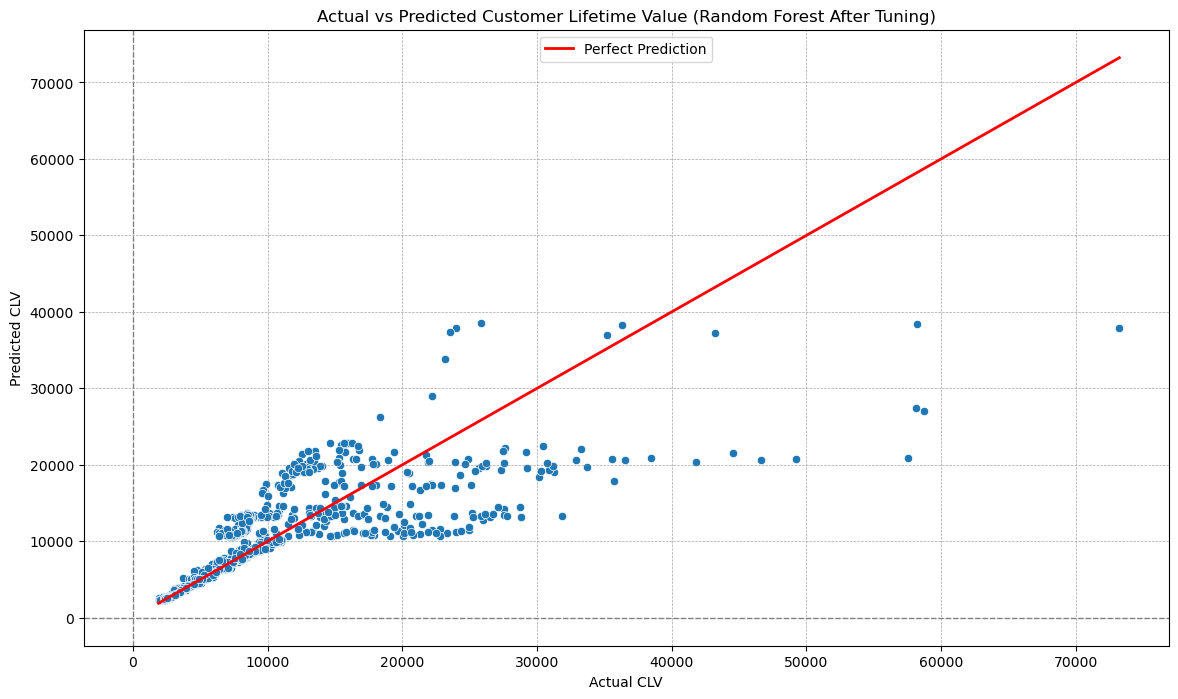

In [58]:
# Create scatterplot for predicted and actual CLV with diagonal line
plt.figure(figsize=(14, 8))

# Plot the scatterplot
plot = sns.scatterplot(x=y_test, y=y_pred_rf).set(title='Actual vs Predicted Customer Lifetime Value (Random Forest After Tuning)', 
                                                  xlabel='Actual CLV', 
                                                  ylabel='Predicted CLV')

# Add horizontal and vertical grid lines
plt.axhline(0, color='grey', linestyle='--', linewidth=1) # Add horizontal reference line at zero residual
plt.axvline(0, color='grey', linestyle='--', linewidth=1) # Add vertical reference line at zero

# Add diagonal line (y = x) to compare predicted vs actual values
max_value = max(y_test.max(), y_pred_rf.max())
min_value = min(y_test.min(), y_pred_rf.min())
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='-', linewidth=2, label='Perfect Prediction')

# Add grid and customize
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.legend()
plt.show()


In [59]:
# Calculate residuals
residuals = y_test - y_pred_rf

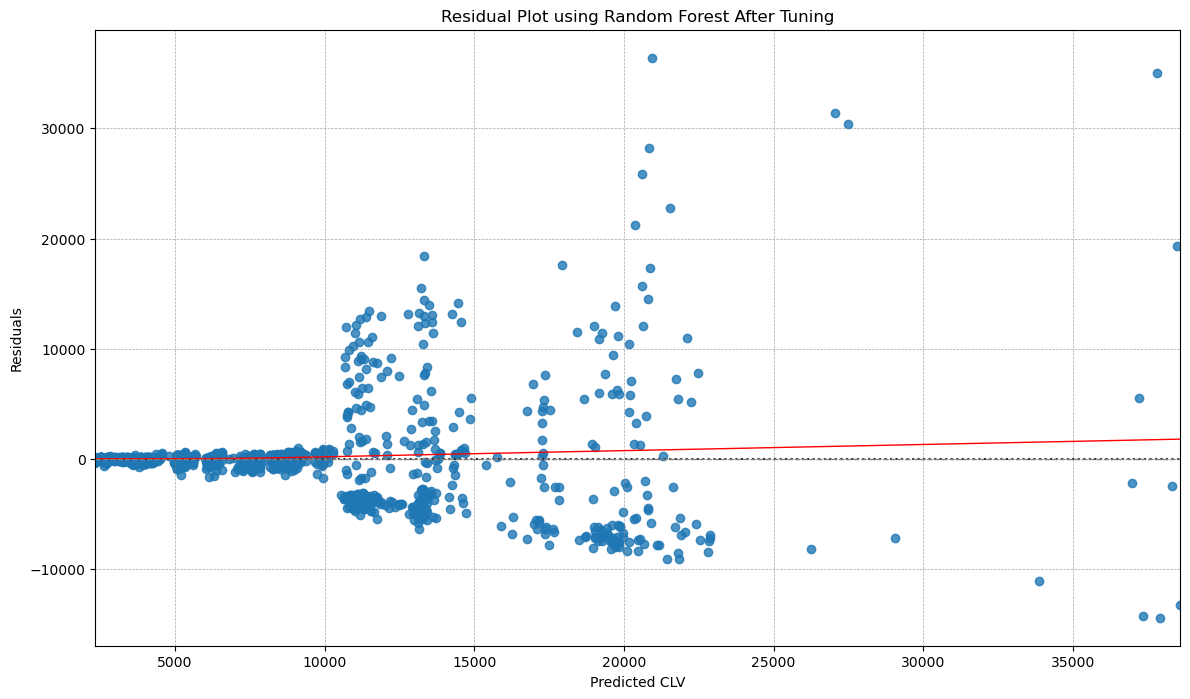

In [60]:
# Create a residual plot
plt.figure(figsize=(14, 8))
sns.residplot(x=y_pred_rf, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, color='grey', linestyle='--', linewidth=1) # Add horizontal reference line at zero residual
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')
plt.title('Residual Plot using Random Forest After Tuning')
plt.show()

Interpretasi:

* Model Random Forest After Tuning ini menunjukkan kinerja yang baik pada prediksi CLV dengan nilai rendah hingga menengah, tetapi mulai kehilangan akurasi pada nilai yang lebih tinggi.
* Untuk memperbaiki model, mungkin perlu untuk mengeksplorasi lebih lanjut fitur-fitur yang relevan atau mempertimbangkan penggunaan model lain untuk prediksi pada rentang CLV yang lebih tinggi.


Selanjutnya akan dilakukan Analisis *feature importance*, yang dapat membantu memahami fitur mana yang paling berkontribusi terhadap prediksi.

**Feature Importance**

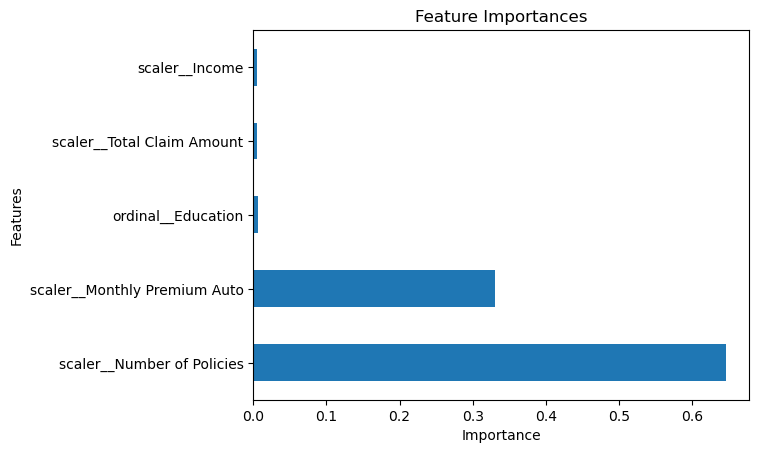

In [61]:
# Mengakses model terbaik dari RandomizedSearchCV
best_model_rf = random_rf.best_estimator_

# Jika best_model_rf adalah pipeline, ambil estimator RandomForestRegressor di dalamnya
rf_model = best_model_rf.named_steps['model']  # 'model' adalah nama langkah estimator di pipeline

# Mendapatkan feature importances dari model Random Forest
feature_imp = pd.Series(rf_model.feature_importances_, 
                        col_transform_true.get_feature_names_out()).sort_values(ascending=False).head()

# Plot feature importances
feature_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [62]:
# Convert feature importance into a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_imp.index,       # Nama fitur
    'Importance': feature_imp.values    # Nilai importance
}).reset_index(drop=True)

# Display the DataFrame
feature_imp_df


Feature  Importance
0    scaler__Number of Policies    0.645693
1  scaler__Monthly Premium Auto    0.330710
2            ordinal__Education    0.006230
3    scaler__Total Claim Amount    0.004960
4                scaler__Income    0.004476

Interpretasi:

1. `scaler__Number of Policies (64.57%)`
<br>Fitur ini memiliki pengaruh terbesar terhadap model prediksi. Jumlah polis yang dimiliki pelanggan adalah indikator utama dalam menentukan Customer Lifetime Value (CLV). Pelanggan dengan lebih banyak polis cenderung menghasilkan nilai CLV yang lebih tinggi.

2. `scaler__Monthly Premium Auto (33.07%)`
<br>Besarnya premi bulanan asuransi kendaraan juga memiliki kontribusi signifikan dalam menentukan CLV. Premi yang lebih tinggi menunjukkan komitmen finansial pelanggan yang lebih besar, yang berdampak pada nilai keseluruhan pelanggan.

3. `ordinal__Education (0.62%)`
<br>Tingkat pendidikan pelanggan memberikan kontribusi yang sangat kecil terhadap prediksi CLV. Meskipun demikian, fitur ini mungkin mencerminkan pola tertentu dalam pengambilan keputusan pelanggan.

4. `scaler__Total Claim Amount (0.50%)`
<br>Total jumlah klaim pelanggan juga hanya memiliki pengaruh kecil terhadap model. Hal ini mungkin menunjukkan bahwa klaim tidak secara langsung mencerminkan potensi nilai pelanggan dalam jangka panjang.

5. `scaler__Income (0.45%)`
<br>Pendapatan pelanggan memiliki pengaruh paling kecil di antara semua fitur. Hal ini mungkin terjadi karena pendapatan pelanggan tidak selalu mencerminkan perilaku pembelian mereka dalam konteks asuransi.

Maka feature importance yang paling berpengaruh adalah:

* Fitur utama: Number of Policies dan Monthly Premium Auto adalah dua fitur yang paling menentukan dalam model. Strategi bisnis sebaiknya lebih fokus pada pelanggan dengan lebih banyak polis dan premi bulanan yang tinggi untuk meningkatkan profitabilitas.
* Fitur dengan pengaruh kecil: Education, Total Claim Amount, dan Income memiliki pengaruh yang kecil. Namun, fitur-fitur ini tetap memberikan informasi tambahan yang dapat membantu memperkuat analisis dan segmentasi pelanggan.


#### **Data Preprocessing**

**Melatih Model dengan Fitur yang Diperoleh dari Feature Importance**

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Memilih fitur berdasarkan feature importance yang lebih besar dari threshold
selected_features = ['Number of Policies', 'Monthly Premium Auto']

# Menyaring X_train dan X_test hanya dengan fitur yang terpilih
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Mengakses model terbaik dari RandomizedSearchCV
best_model_rf_importance = random_rf.best_estimator_

# Jika best_model_rf_importance adalah pipeline, ambil estimator RandomForestRegressor di dalamnya
rf_model_importance = best_model_rf_importance.named_steps['model']  # 'model' adalah nama langkah estimator di pipeline

# Fitting model menggunakan hanya fitur terpilih
rf_model_importance.fit(X_train_selected, y_train)

# Prediksi pada data uji
y_pred_rf_importance = rf_model_importance.predict(X_test_selected)

# Hitung metrik evaluasi
rmse_rf_importance = np.sqrt(mean_squared_error(y_test, y_pred_rf_importance))
mae_rf_importance = mean_absolute_error(y_test, y_pred_rf_importance)
mape_rf_importance = mean_absolute_percentage_error(y_test, y_pred_rf_importance)
r2_rf_importance = rf_model_importance.score(X_test_selected, y_test)  # R-squared

# Buat DataFrame untuk menyimpan metrik evaluasi
score_rf_importance = pd.DataFrame({
    'RMSE': [rmse_rf_importance],
    'MAE': [mae_rf_importance], 
    'MAPE': [mape_rf_importance], 
    'R-square': [r2_rf_importance]},
    index=['After Tuning Random Forest Regressor with Feature Importance'])

# Tampilkan tabel
display(score_rf_importance)


RMSE          MAE  \
After Tuning Random Forest Regressor with Featu...  3978.760077  1821.236292   

                                                        MAPE  R-square  
After Tuning Random Forest Regressor with Featu...  0.147391  0.672381

In [64]:
# Hasil evaluasi sebelum tuning
score_before_tuning = pd.DataFrame({
    'Model': models.keys(),
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape,
    'R-square': score_r2
})

# Hasil evaluasi setelah tuning (RF dari GridSearchCV)
score_after_tuning_rf = pd.DataFrame({
    'Model': ['After Tuning Random Forest'],  # Model yang dituning
    'RMSE': [rmse_after_tuning_rf],
    'MAE': [mae_after_tuning_rf],
    'MAPE': [mape_after_tuning_rf],
    'R-square': [r2_after_tuning_rf]
})

# Hasil evaluasi setelah tuning (XGBoost dari GridSearchCV)
score_after_tuning_xgb = pd.DataFrame({
    'Model': ['After Tuning XGBoost'],
    'RMSE': [rmse_after_tuning_xgb],
    'MAE': [mae_after_tuning_xgb], 
    'MAPE': [mape_after_tuning_xgb], 
    'R-square': [r2_after_tuning_xgb]
})

# Hasil evaluasi setelah tuning (AdaBoost dari GridSearchCV)
score_after_tuning_ada = pd.DataFrame({
    'Model': ['After Tuning AdaBoost'],
    'RMSE': [rmse_after_tuning_ada],
    'MAE': [mae_after_tuning_ada], 
    'MAPE': [mape_after_tuning_ada], 
    'R-square': [r2_after_tuning_ada]
})

# Buat DataFrame untuk menyimpan metrik evaluasi
score_rf_importance = pd.DataFrame({
    'Model': ['After Tuning Random Forest Regressor with Feature Importance'],
    'RMSE': [rmse_rf_importance],
    'MAE': [mae_rf_importance], 
    'MAPE': [mape_rf_importance], 
    'R-square': [r2_rf_importance]

})

# Gabungkan hasil sebelum dan sesudah tuning
comparison_result = pd.concat([score_before_tuning, score_after_tuning_rf,score_after_tuning_xgb,score_after_tuning_ada,score_rf_importance], ignore_index=True)

# Tampilkan tabel perbandingan
print("Evaluation Results Comparison:")
display(comparison_result)


Evaluation Results Comparison:


Model         RMSE  \
0                                       RandomForest  4257.430667   
1                                            XGBoost  4351.915318   
2                                  AdaBoostRegressor  5148.260656   
3                         After Tuning Random Forest  3989.682808   
4                               After Tuning XGBoost  4030.134274   
5                              After Tuning AdaBoost  4048.039469   
6  After Tuning Random Forest Regressor with Feat...  3978.760077   

           MAE      MAPE  R-square  
0  1755.020960  0.132221  0.624881  
1  2197.993207  0.226920  0.608046  
2  3615.780673  0.463472  0.451477  
3  1798.109149  0.142341  0.670579  
4  1812.673646  0.149407  0.663866  
5  1757.520215  0.133922  0.660872  
6  1821.236292  0.147391  0.672381

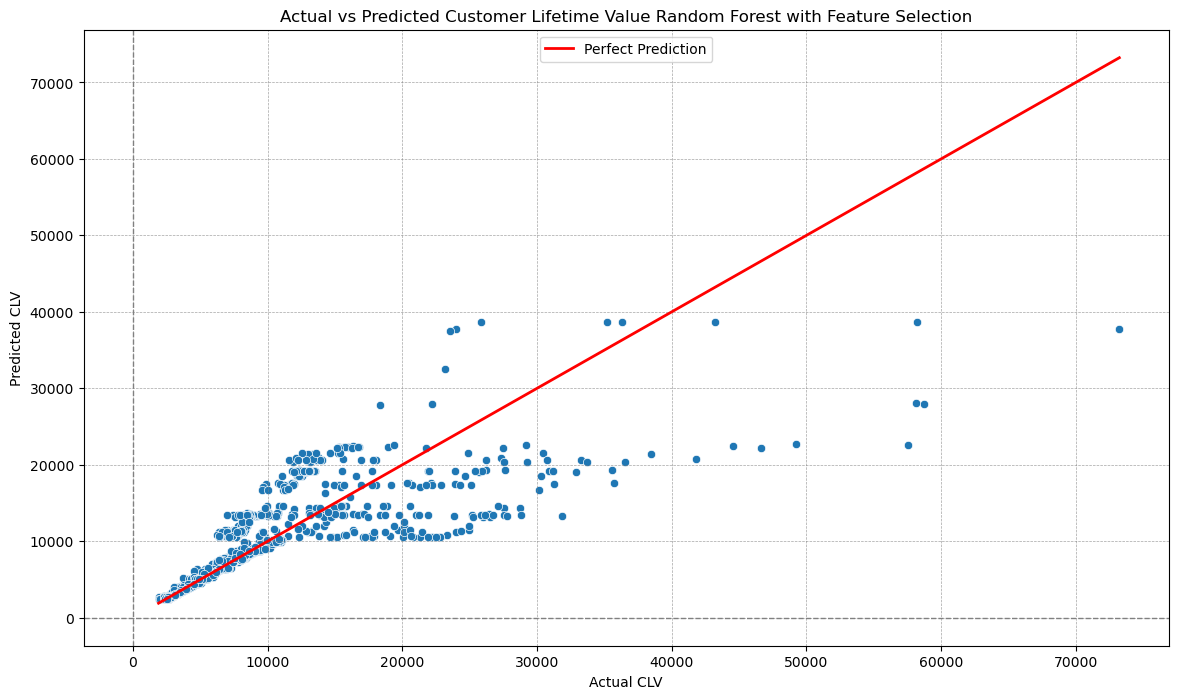

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan prediksi menggunakan model yang telah dilatih dengan feature selection
y_pred_rf_importance =  rf_model_importance.predict(X_test_selected)

# Create scatterplot for predicted and actual CLV with diagonal line
plt.figure(figsize=(14, 8))

# Plot the scatterplot (menggunakan y_test untuk nilai aktual dan y_pred_selection untuk prediksi)
plot = sns.scatterplot(x=y_test, y=y_pred_rf_importance).set(title='Actual vs Predicted Customer Lifetime Value Random Forest with Feature Selection', 
                                                          xlabel='Actual CLV', 
                                                          ylabel='Predicted CLV')

# Add horizontal and vertical grid lines
plt.axhline(0, color='grey', linestyle='--', linewidth=1)  # Garis referensi horizontal
plt.axvline(0, color='grey', linestyle='--', linewidth=1)  # Garis referensi vertical

# Add diagonal line (y = x) untuk membandingkan prediksi dan nilai aktual
max_value = max(y_test.max(), y_pred_rf_importance.max())
min_value = min(y_test.min(), y_pred_rf_importance.min())
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='-', linewidth=2, label='Perfect Prediction')

# Add grid dan customize
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.legend()
plt.show()


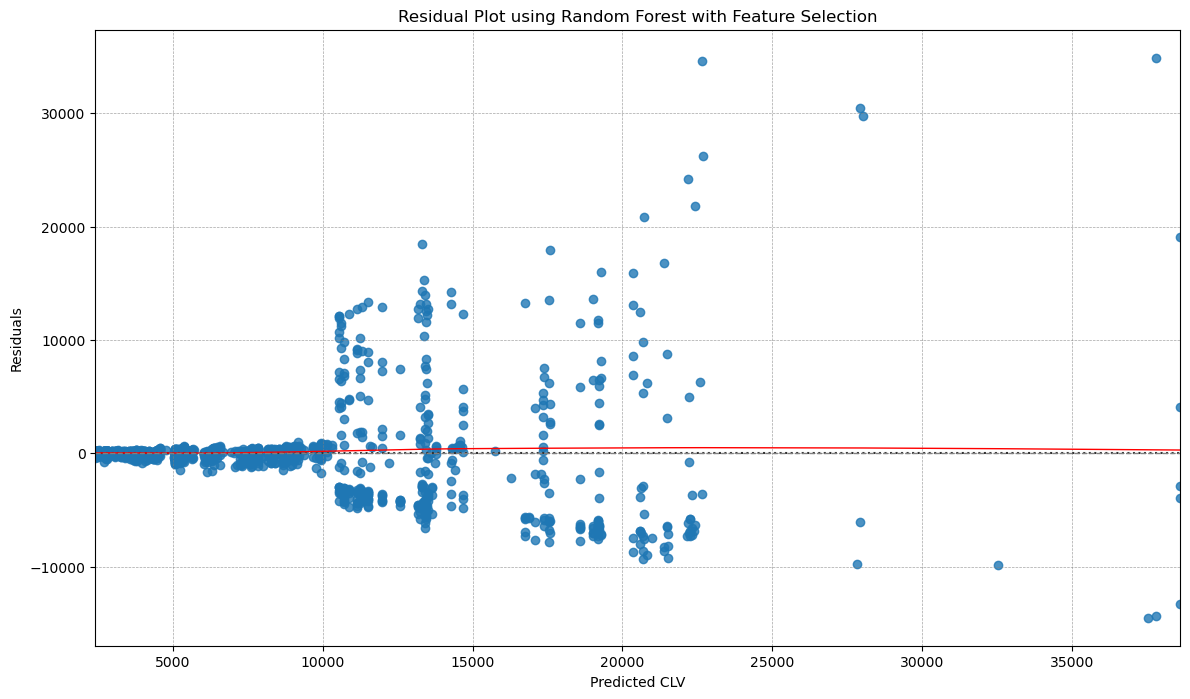

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan prediksi menggunakan model yang telah dilatih dengan feature selection
y_pred_rf_importance = rf_model_importance.predict(X_test_selected)

# Menghitung residuals
residuals = y_test - y_pred_rf_importance

# Create a residual plot
plt.figure(figsize=(14, 8))
sns.residplot(x=y_pred_rf_importance, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})

# Menambahkan garis horizontal pada residual 0
plt.axhline(0, color='grey', linestyle='--', linewidth=1)

# Menambahkan grid untuk plot
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Label untuk sumbu X dan Y
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')

# Menambahkan judul
plt.title('Residual Plot using Random Forest with Feature Selection')

# Tampilkan plot
plt.show()


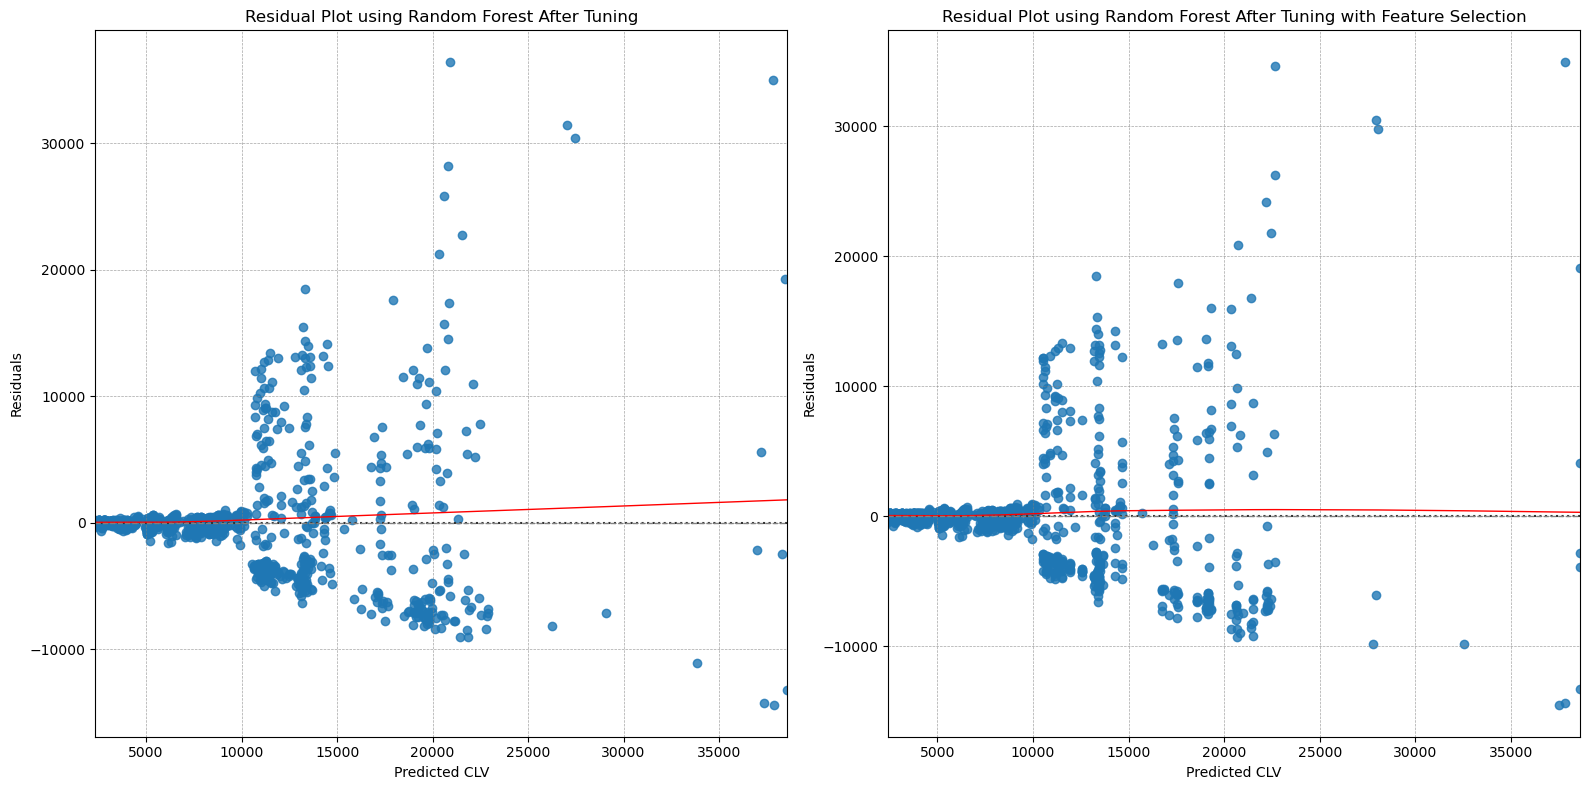

In [67]:

# Pastikan prediksi menggunakan model yang telah dilatih dengan feature selection
y_pred_rf_importance = rf_model_importance.predict(X_test_selected)

# Menghitung residuals untuk kedua plot
residuals_rf = y_test - y_pred_rf  # Residuals for the first model (Random Forest)
residuals_rf_importance = y_test - y_pred_rf_importance  # Residuals for the second model (RF with feature selection)

# Membuat figure dengan dua subplots
plt.figure(figsize=(16, 8))

# Plot pertama (Residual Plot Random Forest)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')
plt.title('Residual Plot using Random Forest After Tuning')

# Plot kedua (Residual Plot RF dengan Feature Selection)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.residplot(x=y_pred_rf_importance, y=residuals_rf_importance, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals')
plt.title('Residual Plot using Random Forest After Tuning with Feature Selection')

# Tampilkan kedua plot
plt.tight_layout() 
plt.show()


Interpretasi

1. Distribusi Residu:<br>
- Pada kedua plot, sebagian besar residu berkumpul di sekitar garis nol, menunjukkan bahwa model mampu memprediksi CLV dengan cukup baik untuk sebagian besar data.
- Namun, terdapat beberapa nilai residu yang sangat besar (outliers), yang mengindikasikan model kesulitan memprediksi dengan akurat untuk data tertentu.

2. Pengaruh Seleksi Fitur:
- Plot kanan (dengan seleksi fitur) menunjukkan distribusi residu yang sedikit lebih terpusat dibandingkan dengan plot kiri. Hal ini mengindikasikan bahwa seleksi fitur membantu model menjadi lebih sederhana, sehingga prediksi lebih stabil.
- Seleksi fitur juga tampaknya mengurangi penyebaran residu secara keseluruhan, terutama untuk nilai CLV yang lebih besar.

3. Kecenderungan Garis Merah (Trend Line):
- Garis merah di kedua plot menunjukkan rata-rata kecenderungan residu. Di kedua kasus, garis ini mendekati nol, menunjukkan tidak ada bias sistematis yang signifikan dalam model. Namun, garis di plot kanan lebih datar mengindikasikan bahwa model setelah seleksi fitur memiliki performa yang lebih seragam.

4. Outliers:
- Kedua plot menunjukkan adanya residu dengan nilai yang sangat besar, terutama untuk prediksi CLV yang tinggi. Hal ini dapat menjadi indikasi bahwa model perlu dioptimalkan lebih lanjut atau bahwa terdapat pola data yang tidak dapat dijelaskan oleh model.



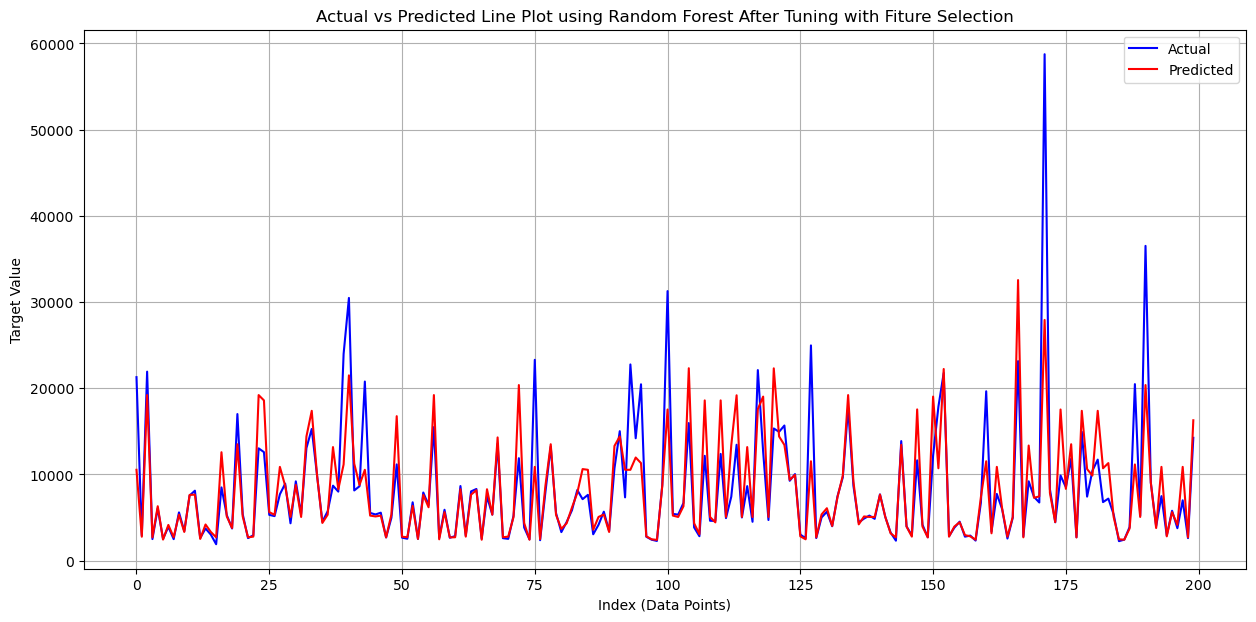

In [68]:
sample_size = 200  # Take the first 100 data points for better visualization
y_test_sample = y_test[:sample_size]
y_pred_sample = y_pred_rf_importance[:sample_size]

# Create a dataframe for sns lineplot
plot_data = pd.DataFrame({
    'Index': range(len(y_test_sample)),
    'Actual': y_test_sample,
    'Predicted': y_pred_sample
})

# Using sns.lineplot for visualizationß
plt.figure(figsize=(15, 7))
sns.lineplot(data=plot_data, x='Index', y='Actual', label='Actual', color='blue')
sns.lineplot(data=plot_data, x='Index', y='Predicted', label='Predicted', color='red')

# Add title and axis labels
plt.xlabel('Index (Data Points)')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Line Plot using Random Forest After Tuning with Fiture Selection')
plt.legend()
plt.grid(True)
plt.show()

### **Residual Analysis**

In [69]:
dataframe = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred_rf_importance,
})

dataframe['Residual'] = dataframe['Actual'] - dataframe['Predicted']
dataframe.sort_index()

Actual     Predicted     Residual
0     10083.486880  13650.843030 -3567.356150
3      4550.856045   4448.547110   102.308935
5      8649.700578   8275.760337   373.940241
10     6259.510365   6132.547347   126.963018
15     2402.333284   2404.720234    -2.386950
...            ...           ...          ...
5659   4995.171200   5327.418152  -332.246952
5660   4936.888359   5344.199194  -407.310835
5661   7457.344801   7230.451714   226.893087
5663   8114.409136  11523.349822 -3408.940686
5668   7664.219255   8675.321315 -1011.102060

[1516 rows x 3 columns]

In [70]:
residuals = y_test - y_pred_rf_importance,

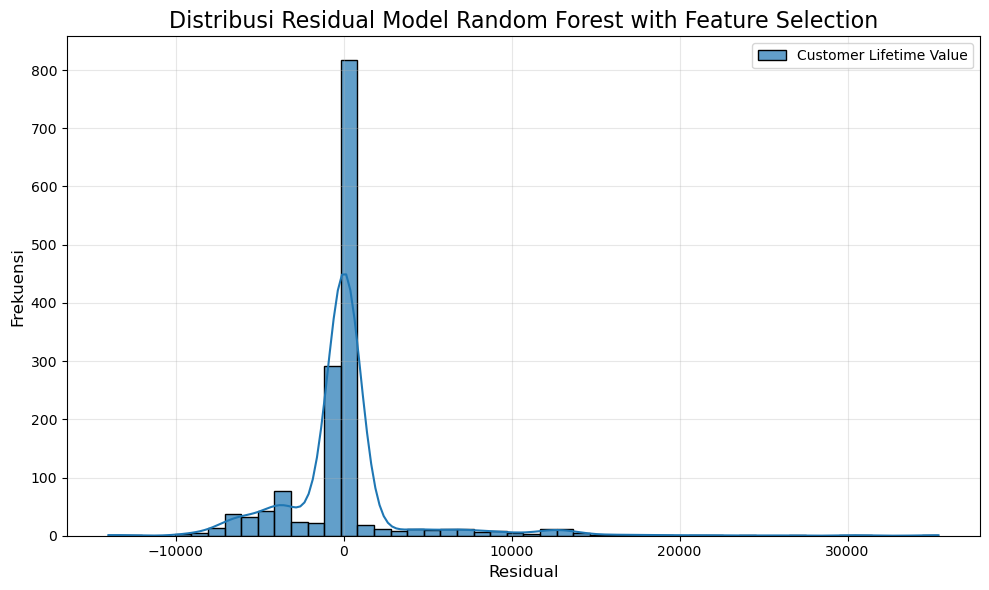

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat histogram residual 
plt.figure(figsize=(10, 6)) 
sns.histplot(residuals, kde=True, color="blue", bins=50, alpha=0.7)
plt.title('Distribusi Residual Model Random Forest with Feature Selection', fontsize=16) 
plt.xlabel('Residual', fontsize=12) 
plt.ylabel('Frekuensi', fontsize=12) 
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Interpretasi
- Model secara keseluruhan menunjukkan performa yang baik karena distribusi residual terkonsentrasi di sekitar nol.
- Namun, keberadaan outlier (residual besar) menunjukkan bahwa ada data atau kondisi tertentu di mana model kurang mampu menangkap pola yang ada.

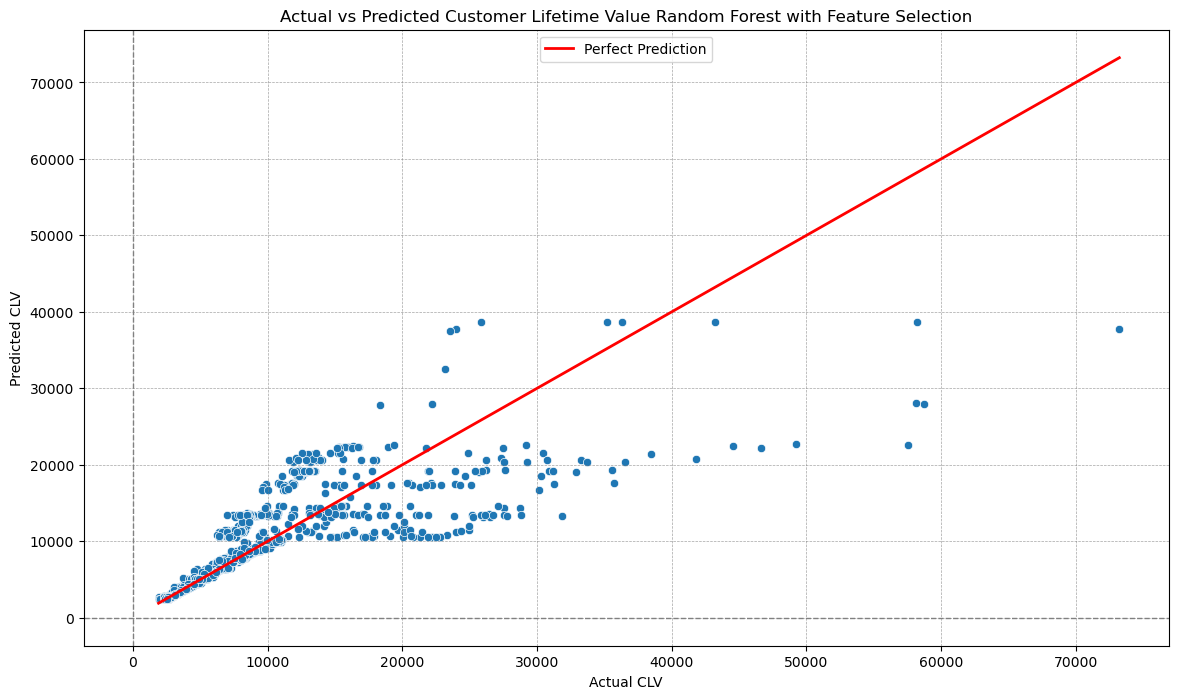

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot for Actual vs Predicted CLV with Feature Selection
plt.figure(figsize=(14, 8))

# Plot the scatterplot
sns.scatterplot(x=y_test, y=y_pred_rf_importance).set(
    title='Actual vs Predicted Customer Lifetime Value Random Forest with Feature Selection',
    xlabel='Actual CLV', 
    ylabel='Predicted CLV')

# Add horizontal and vertical reference lines
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)

# Add a diagonal line (y = x) to compare predicted vs actual values
max_value = max(y_test.max(), y_pred_rf_importance.max())
min_value = min(y_test.min(), y_pred_rf_importance.min())
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='-', linewidth=2, label='Perfect Prediction')

# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend()

# Show the plot
plt.show()


**Gauss-Markov Assumptions**

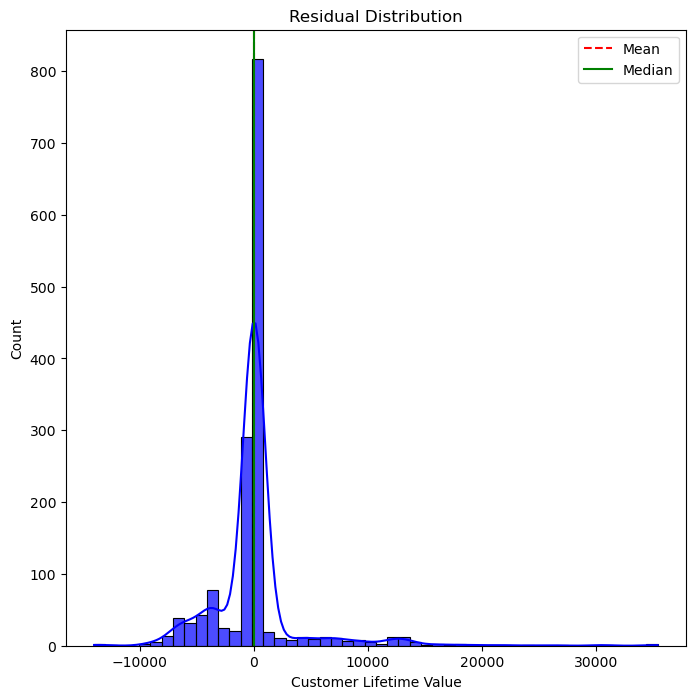

The mean of the residuals is 45.79
The median of the residuals is 51.37


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Menghitung residual
residual = y_test - y_pred_rf_importance

# Gaussian Distribution (Histogram dengan KDE)
plt.figure(figsize=(8, 8))
sns.histplot(residual, kde=True, color='blue', bins=50, alpha=0.7)

# Hitung mean dan median residual
mean_res = np.mean(residual)
median_res = np.median(residual)

# Menambahkan garis vertikal untuk mean dan median
plt.axvline(mean_res, color='r', linestyle='--', label='Mean')
plt.axvline(median_res, color='g', linestyle='-', label='Median')

# Menambahkan judul dan legend
plt.title('Residual Distribution')
plt.legend()

# Menampilkan plot
plt.show()

# Menampilkan nilai mean dan median dari residual
print(f'The mean of the residuals is {round(mean_res, 2)}')
print(f'The median of the residuals is {round(median_res, 2)}')


In [74]:
from scipy.stats import normaltest

# Normalitas Test untuk Residual dengan Pearson Normal Test
stat, p_value = normaltest(residual)
print(f'Normality Test Statistic: {stat}')
print(f'p-Value: {p_value}')

# Menentukan apakah data terdistribusi normal atau tidak
if p_value < 0.05:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')


Normality Test Statistic: 1048.5380173212639
p-Value: 2.0552398202904583e-228
The data is not normally distributed


**1. Cek Asumsi Gauss-Markov (Mean dan Median Residuals)** 
- Perbedaan antara mean dan median residuals menunjukkan bahwa distribusi residual tidak simetris di sekitar nol. Hal ini melanggar asumsi zero conditional mean dalam teorema Gauss-Markov, yang mensyaratkan distribusi residual seimbang dengan mean nol.

**2. Uji Normalitas** 
- Nilai p yang sangat kecil menunjukkan bahwa data secara statistik signifikan tidak memenuhi asumsi normalitas. 

Berdasarkan kondisi di atas, seperti perbedaan antara median dan mean residual, kurangnya normalitas dalam distribusi residual, dan adanya heteroskedastisitas, semuanya menunjukkan potensi pelanggaran terhadap asumsi-asumsi utama dalam Teorema Gauss-Markov.

Jadi, saya dapat mengatakan bahwa hasil dari model melanggar asumsi utama dalam teorema Gauss-Markov, yang dapat menyebabkan bias pada estimasi dan prediksi. Bias dalam konteks ini mengacu pada kesalahan sistematis atau ketidakakuratan dalam prediksi model yang muncul dari pelanggaran asumsi dasar atau dari struktur model itu sendiri.

Dalam hal ini, model menunjukkan pelanggaran seperti ketidaknormalan residual, heteroskedastisitas, dan perbedaan antara median dan mean residual, yang mengindikasikan potensi sumber bias dalam model. Masalah-masalah ini dapat menyebabkan estimasi parameter yang tidak akurat, interval kepercayaan yang tidak dapat diandalkan, dan prediksi yang terdistorsi.

## **5. Conclusion**

Berdasarkan hasil dari scatter plot, distribusi residual, dan interpretasi model Random Forest untuk memprediksi Customer Lifetime Value (CLV), berikut adalah kesimpulan utama:

1. Kinerja Model:
    - Model Random Forest yang sudah dilakukan tuning menunjukkan peningkatan performa, dengan prediksi yang lebih dekat ke garis perfect prediction. Namun, masih terdapat outliers, terutama pada pelanggan dengan CLV tinggi, di mana model mengalami kesalahan prediksi yang signifikan.
    - Sebagian besar residual berada di sekitar nol, menunjukkan bahwa model tidak memiliki bias signifikan. Namun, distribusi residual memiliki ekor panjang karena kesalahan besar pada beberapa kasus ekstrem.

2. Fokus Kesalahan:
    - Kesalahan terbesar ditemukan pada pelanggan dengan CLV tinggi, yang mungkin disebabkan oleh kurangnya data representatif untuk pelanggan-pelanggan ini atau pola kompleks yang tidak sepenuhnya ditangkap oleh model.

3. Reliabilitas Prediksi:
    - Model cukup andal untuk memprediksi pelanggan dengan CLV rendah hingga menengah. Namun, untuk pelanggan CLV tinggi, model masih perlu diperbaiki untuk meningkatkan akurasi.


## **6. Recommendation**

#### Rekomendasi Model

1. `Lakukan A/B testing pada data terbaru, terutama untuk data yang berada dalam rentang outliers yang terlalu besar maupun terlalu kecil, karena model mengakibatkan kesalahan signifikan pada data dengan transaksi tidak wajar.`

2. `Tambahkan fitur baru yang relevan seperti:`Frekuensi pembelian (frequency). Waktu rata-rata antar pembelian (recency). aktivitas terakhir pelanggan, loyalitas pelanggan, jenis produk yang dibeli, dan promosi yang diikuti.

3. Lakukan analisis feature importance lebih mendalam untuk memahami kontribusi tiap variabel.

4. Perbaiki Kesalahan pada Outliers: Lakukan analisis mendalam pada pelanggan dengan CLV tinggi dan residual besar untuk memahami pola-pola unik.

#### Rekomendasi Bisnis

1. Segmentasi pelanggan berdasarkan nilai CLV (e.g., low, medium, high) untuk menangkap pola prediktif yang lebih spesifik.

2. Fokus pada strategi retensi pelanggan high-value dengan personalisasi kampanye marketing untuk mengoptimalkan ROI.

3. Terapkan program loyalitas untuk segmen pelanggan dengan nilai CLV di atas rata-rata.


In [77]:
import pickle

# Ambil model terbaik dari RandomizedSearchCV
final_model_rf = random_rf.best_estimator_  # Model terbaik setelah tuning

# Fitting ulang model pada seluruh data training (jika diperlukan)
final_model_rf.fit(X_train, y_train)  # Menggunakan fitur lengkap dari data training

# Simpan model terbaik
with open('best_random_forest_model.sav', 'wb') as file:
    pickle.dump(final_model_rf, file)

print("Model terbaik Random Forest telah disimpan sebagai 'best_random_forest_model.sav'")


Model terbaik Random Forest telah disimpan sebagai 'best_random_forest_model.sav'
